<br>

## Final Project: GWAS
#### Erika Moore
#### CS35



In [ ]:
!pip install hail

## <mark> Step 1: Get familiar with Hail through a GWAS 🧬
This is the tutorial I used to become familiar with Hail: [Walkthrough Reference](https://hail.is/docs/0.2/tutorials/01-genome-wide-association-study.html) </mark>

In [ ]:
import hail as hl
hl.stop()
hl.init()

Running on Apache Spark version 3.3.2
SparkUI available at http://ce36f80494ad:4040
Welcome to
     __  __     <>__
    / /_/ /__  __/ /
   / __  / _ `/ / /
  /_/ /_/\_,_/_/_/   version 0.2.119-ca0ff87b1687
LOGGING: writing to /content/hail-20230722-0206-0.2.119-ca0ff87b1687.log


In [ ]:
# import standard libraries
from hail.plot import show
from pprint import pprint
hl.plot.output_notebook()

In [ ]:
# download public 1000 genomes data
hl.utils.get_1kg('data/')
hl.utils.get_hgdp('data2/')

2023-07-22 02:06:52.756 Hail: INFO: 1KG files found
2023-07-22 02:06:52.784 Hail: INFO: HGDP files found


In [ ]:
# import data from VCF, write as Matrix Table (Hail's native file format)
hl.import_vcf('data/1kg.vcf.bgz').write('data/1kg.mt', overwrite=True)

2023-07-22 02:07:00.520 Hail: INFO: scanning VCF for sortedness...
2023-07-22 02:07:21.001 Hail: INFO: Coerced sorted VCF - no additional import work to do
2023-07-22 02:07:45.943 Hail: INFO: wrote matrix table with 10879 rows and 284 columns in 1 partition to data/1kg.mt


In [ ]:
# read written file
mt = hl.read_matrix_table('data/1kg.mt')

In [ ]:
# mt.show()
# mt.row
# mt.head(10)
# mt.rows().describe()
mt.rows().show(5)
# mt.rows().count()

+---------------+------------+------+----------+----------+--------------+
| locus         | alleles    | rsid |     qual | filters  | info.AC      |
+---------------+------------+------+----------+----------+--------------+
| locus<GRCh37> | array<str> | str  |  float64 | set<str> | array<int32> |
+---------------+------------+------+----------+----------+--------------+
| 1:904165      | ["G","A"]  | NA   | 5.23e+04 | NA       | [518]        |
| 1:909917      | ["G","A"]  | NA   | 1.58e+03 | NA       | [18]         |
| 1:986963      | ["C","T"]  | NA   | 3.98e+02 | NA       | [5]          |
| 1:1563691     | ["T","G"]  | NA   | 1.09e+03 | NA       | [64]         |
| 1:1707740     | ["T","G"]  | NA   | 9.35e+04 | NA       | [997]        |
+---------------+------------+------+----------+----------+--------------+

+----------------+---------+-------------------+----------------------+
| info.AF        | info.AN | info.BaseQRankSum | info.ClippingRankSum |
+----------------+---------+-------------------+----------------------+
| array<float64> |   int32 |           float64 |              float64 |
+----------------+---------+-------------------+----------------------+
| [1.03e-01]     |    5020 |         -3.39e+00 |            -1.70e-01 |
| [3.73e-03]     |    4830 |         -1.48e+00 |             1.26e-01 |
| [1.09e-03]     |    4588 |          1.25e+00 |            -3.77e+00 |
| [1.30e-02]     |    4766 |         -3.87e+01 |            -5.39e+00 |
| [1.98e-01]     |    5034 |         -4.04e+01 |            -2.87e-01 |
+----------------+---------+-------------------+----------------------+

+---------+---------+----------+---------------------+----------------------+
| info.DP | info.DS |  info.FS | info.HaplotypeScore | info.InbreedingCoeff |
+---------+---------+----------+---------------------+----------------------+
|   int32 |    bool |  float64 |             float64 |              float64 |
+---------+---------+----------+---------------------+----------------------+
|   17827 |   False | 2.23e+00 |                  NA |             9.88e-02 |
|   14671 |   False | 5.52e+00 |                  NA |            -5.00e-04 |
|   12398 |   False | 8.34e-01 |                  NA |             1.26e-02 |
|   15357 |   False | 1.90e+03 |                  NA |             2.70e-02 |
|   19902 |   False | 3.31e+00 |                  NA |             3.87e-02 |
+---------+---------+----------+---------------------+----------------------+

+--------------+----------------+----------+----------+----------------+
| info.MLEAC   | info.MLEAF     |  info.MQ | info.MQ0 | info.MQRankSum |
+--------------+----------------+----------+----------+----------------+
| array<int32> | array<float64> |  float64 |    int32 |        float64 |
+--------------+----------------+----------+----------+----------------+
| [514]        | [1.02e-01]     | 5.91e+01 |        0 |       1.45e+00 |
| [15]         | [3.11e-03]     | 5.91e+01 |        0 |       1.76e+00 |
| [3]          | [6.54e-04]     | 5.79e+01 |        0 |       5.86e-01 |
| [22]         | [4.62e-03]     | 5.90e+01 |        0 |       1.31e+00 |
| [983]        | [1.95e-01]     | 5.83e+01 |        0 |       9.48e+00 |
+--------------+----------------+----------+----------+----------------+

+----------+---------------------+----------+
|  info.QD | info.ReadPosRankSum | info.set |
+----------+---------------------+----------+
|  float64 |             float64 | str      |
+----------+---------------------+----------+
| 1.50e+01 |            6.29e+00 | NA       |
| 1.37e+01 |           -1.43e+00 | NA       |
| 1.73e+01 |            7.10e-01 | NA       |
| 5.05e+00 |            1.15e+00 | NA       |
| 1.36e+01 |            2.26e+00 | NA       |
+----------+---------------------+----------+
showing top 5 rows

In [ ]:
# we seem to have only one column field
mt.cols().show(5)

2023-07-22 02:07:54.563 Hail: WARN: cols(): Resulting column table is sorted by 'col_key'.
    To preserve matrix table column order, first unkey columns with 'key_cols_by()'


""
s
str
"""HG00096"""
"""HG00099"""
"""HG00105"""
"""HG00118"""
"""HG00129"""


In [ ]:
# rows meth to get a table with all row fields in Matrix table
# rows method and select meth to pull out only five variants
# mt.rows().describe()
# mt.rows().select('info').show(5)
# mt.rows().info.AC.show()
mt.rows().select().show(5)

,
locus,alleles
locus<GRCh37>,array<str>
1:904165,"[""G"",""A""]"
1:909917,"[""G"",""A""]"
1:986963,"[""C"",""T""]"
1:1563691,"[""T"",""G""]"
1:1707740,"[""T"",""G""]"


In [ ]:
# peek at first few sample IDs
mt.s.show(5)
# mt.cols().show()
# mt.s.show()
# mt.pheno.Population.show()

""
s
str
"""HG00096"""
"""HG00099"""
"""HG00105"""
"""HG00118"""
"""HG00129"""


In [ ]:
# use entries (along with select and take) to look at first few genotype calls
# take method collects first n rows into a list
mt.entry.take(5)

[Struct(GT=Call(alleles=[0, 0], phased=False), AD=[4, 0], DP=4, GQ=12, PL=[0, 12, 147]),
 Struct(GT=Call(alleles=[0, 0], phased=False), AD=[8, 0], DP=8, GQ=24, PL=[0, 24, 315]),
 Struct(GT=Call(alleles=[0, 0], phased=False), AD=[8, 0], DP=8, GQ=23, PL=[0, 23, 230]),
 Struct(GT=Call(alleles=[0, 0], phased=False), AD=[7, 0], DP=7, GQ=21, PL=[0, 21, 270]),
 Struct(GT=Call(alleles=[0, 0], phased=False), AD=[5, 0], DP=5, GQ=15, PL=[0, 15, 205])]

In [ ]:
# alternatively show method prints the first n rows to the console in a table format
mt.entry.show(5)

,
locus,alleles
locus<GRCh37>,array<str>
1:904165,"[""G"",""A""]"
1:909917,"[""G"",""A""]"
1:986963,"[""C"",""T""]"
1:1563691,"[""T"",""G""]"
1:1707740,"[""T"",""G""]"


In [ ]:
mt.rows().show()

+---------------+------------+------+----------+----------+--------------+
| locus         | alleles    | rsid |     qual | filters  | info.AC      |
+---------------+------------+------+----------+----------+--------------+
| locus<GRCh37> | array<str> | str  |  float64 | set<str> | array<int32> |
+---------------+------------+------+----------+----------+--------------+
| 1:904165      | ["G","A"]  | NA   | 5.23e+04 | NA       | [518]        |
| 1:909917      | ["G","A"]  | NA   | 1.58e+03 | NA       | [18]         |
| 1:986963      | ["C","T"]  | NA   | 3.98e+02 | NA       | [5]          |
| 1:1563691     | ["T","G"]  | NA   | 1.09e+03 | NA       | [64]         |
| 1:1707740     | ["T","G"]  | NA   | 9.35e+04 | NA       | [997]        |
| 1:2252970     | ["C","T"]  | NA   | 7.36e+02 | NA       | [6]          |
| 1:2284195     | ["T","C"]  | NA   | 1.42e+05 | NA       | [1559]       |
| 1:2779043     | ["T","C"]  | NA   | 2.89e+05 | NA       | [3532]       |
| 1:2944527     | ["G","A"]  | NA   | 1.24e+05 | NA       | [1206]       |
| 1:3761547     | ["C","A"]  | NA   | 1.61e+03 | NA       | [30]         |
+---------------+------------+------+----------+----------+--------------+

+----------------+---------+-------------------+----------------------+
| info.AF        | info.AN | info.BaseQRankSum | info.ClippingRankSum |
+----------------+---------+-------------------+----------------------+
| array<float64> |   int32 |           float64 |              float64 |
+----------------+---------+-------------------+----------------------+
| [1.03e-01]     |    5020 |         -3.39e+00 |            -1.70e-01 |
| [3.73e-03]     |    4830 |         -1.48e+00 |             1.26e-01 |
| [1.09e-03]     |    4588 |          1.25e+00 |            -3.77e+00 |
| [1.30e-02]     |    4766 |         -3.87e+01 |            -5.39e+00 |
| [1.98e-01]     |    5034 |         -4.04e+01 |            -2.87e-01 |
| [1.28e-03]     |    4682 |         -1.22e+00 |             1.79e+00 |
| [3.12e-01]     |    4990 |         -4.60e+01 |             3.50e-01 |
| [7.26e-01]     |    4866 |          1.74e+01 |             2.13e+00 |
| [2.45e-01]     |    4928 |          6.30e-02 |            -6.55e-01 |
| [5.95e-03]     |    5044 |         -4.47e+00 |            -8.82e+00 |
+----------------+---------+-------------------+----------------------+

+---------+---------+----------+---------------------+----------------------+
| info.DP | info.DS |  info.FS | info.HaplotypeScore | info.InbreedingCoeff |
+---------+---------+----------+---------------------+----------------------+
|   int32 |    bool |  float64 |             float64 |              float64 |
+---------+---------+----------+---------------------+----------------------+
|   17827 |   False | 2.23e+00 |                  NA |             9.88e-02 |
|   14671 |   False | 5.52e+00 |                  NA |            -5.00e-04 |
|   12398 |   False | 8.34e-01 |                  NA |             1.26e-02 |
|   15357 |   False | 1.90e+03 |                  NA |             2.70e-02 |
|   19902 |   False | 3.31e+00 |                  NA |             3.87e-02 |
|   14900 |   False | 2.82e+00 |                  NA |            -8.20e-03 |
|   18176 |   False | 2.95e+00 |                  NA |             9.25e-02 |
|   12878 |   False | 2.55e+01 |                  NA |             1.44e-01 |
|   17698 |   False | 4.49e-01 |                  NA |             1.23e-01 |
|   16845 |   False | 2.06e+00 |                  NA |            -4.70e-03 |
+---------+---------+----------+---------------------+----------------------+

+--------------+----------------+----------+----------+----------------+
| info.MLEAC   | info.MLEAF     |  info.MQ | info.MQ0 | info.MQRankSum |
+--------------+----------------+----------+----------+----------------+
| array<int32> | array<float64> |  float64 |    int32 |        float64 |
+--------------+----------------+----------+----------+----------------+
| [514]        | [1.02e-01]     

<mark> adding column fields </mark>

*   columns fields seem to mainly describe the trait (phenotype), along with other factors, such as ancestry
*   row fields mainly describe the genome (genotype)


* we can use a text file to annotate the columns in a Matrix Table

In [ ]:
# changed from prior version
import requests

url = 'https://raw.githubusercontent.com/mkveerapen/BroadE_HailWorkshop2020/master/resources/1kg_annotations.txt'

# make an http request to get the json data
result = requests.get(url)
if result.status_code == 200:
  raw_lines = result.text.splitlines()

  # use desired path and filename for the output text file
  output_file_path = 'data2/1kg_annotations.txt'

  # write the content to the output text file
  with open(output_file_path, 'w') as output_file:
    for line in raw_lines:
      output_file.write(line + '\n')
    print("wrote file")

else:
    # if the request was not successful, print an error message
    print(f"Failed to fetch file. Status code: {result.status_code}")

{'payload': {'allShortcutsEnabled': False, 'fileTree': {'resources': {'items': [{'name': '1kg.mt', 'path': 'resources/1kg.mt', 'contentType': 'directory'}, {'name': 'pca_scores.ht', 'path': 'resources/pca_scores.ht', 'contentType': 'directory'}, {'name': 'post_qc.mt', 'path': 'resources/post_qc.mt', 'contentType': 'directory'}, {'name': '1kg.fam', 'path': 'resources/1kg.fam', 'contentType': 'file'}, {'name': '1kg.vcf.bgz', 'path': 'resources/1kg.vcf.bgz', 'contentType': 'file'}, {'name': '1kg_annotations.txt', 'path': 'resources/1kg_annotations.txt', 'contentType': 'file'}, {'name': 'Icon\r', 'path': 'resources/Icon\r', 'contentType': 'file'}, {'name': 'ensembl_gene_annotations.txt', 'path': 'resources/ensembl_gene_annotations.txt', 'contentType': 'file'}, {'name': 'true_pops.txt', 'path': 'resources/true_pops.txt', 'contentType': 'file'}], 'totalCount': 9}, '': {'items': [{'name': 'pollEv_output', 'path': 'pollEv_output', 'contentType': 'directory'}, {'name': 'resources', 'path': 'res

In [ ]:
# 1kg_annotations has 3400 entries
# keyed by Sample because unique
# Population, SuperPop, etc... are the values
table = (hl.import_table('data2/1kg_annotations.txt', impute=True)
         .key_by('s'))

2023-07-22 02:08:20.913 Hail: INFO: Reading table to impute column types
2023-07-22 02:08:22.931 Hail: INFO: Finished type imputation
  Loading field 's' as type str (imputed)
  Loading field 'population' as type str (imputed)
  Loading field 'super_population' as type str (imputed)
  Loading field 'is_female' as type bool (imputed)
  Loading field 'purple_hair' as type bool (imputed)
  Loading field 'caffeine_consumption' as type float64 (imputed)
  Loading field 'six_toes' as type bool (imputed)


In [ ]:
# peek at table structure
table.describe()

----------------------------------------
Global fields:
    None
----------------------------------------
Row fields:
    's': str 
    'population': str 
    'super_population': str 
    'is_female': bool 
    'purple_hair': bool 
    'caffeine_consumption': float64 
    'six_toes': bool 
----------------------------------------
Key: ['s']
----------------------------------------


In [ ]:
# peek at first few values using show
# this is the stuff that was in 1kg_annotations.txt
table.show(width=100)

,,,,,,
s,population,super_population,is_female,purple_hair,caffeine_consumption,six_toes
str,str,str,bool,bool,float64,bool
"""HG00096""","""GBR""","""EUR""",False,False,5.07e+01,False
"""HG00097""","""GBR""","""EUR""",True,False,5.02e+01,False
"""HG00098""","""GBR""","""EUR""",False,False,6.38e+01,False
"""HG00099""","""GBR""","""EUR""",True,False,5.39e+01,False
"""HG00100""","""GBR""","""EUR""",True,False,4.15e+01,False
"""HG00101""","""GBR""","""EUR""",False,False,5.49e+01,False
"""HG00102""","""GBR""","""EUR""",True,False,3.83e+01,False
"""HG00103""","""GBR""","""EUR""",False,False,3.82e+01,False


<mark> investigating (unpacking) the matrix table </mark>

In [ ]:
# example of what entries is (costly)
n_entries = mt.entries().count()
n_rows=mt.rows().count()
n_cols=mt.cols().count()
print(f"entries {n_entries}")
print(f"rows {n_rows}")
print(f"cols{n_cols}")
print(f"Total: {n_rows*n_cols}")

2023-07-22 02:08:25.649 Hail: WARN: entries(): Resulting entries table is sorted by '(row_key, col_key)'.
    To preserve row-major matrix table order, first unkey columns with 'key_cols_by()'


entries 3089636
rows 10879
cols284
Total: 3089636


<mark> joining the annotations table with the matrix table  </mark>

In [ ]:
# use annotate_cols to join the annotations table with the MT containing our dataset
# .s typically refers to the samples
# mt = mt_save

# taking everything in annot table (table) whose key (Sample) is found in mt.s
# finding the matches (conceptually an intersection)
temp = table[mt.s]
temp.show()

# adding the matches to the mt as the column 'pheno'
mt_annot = mt.annotate_cols(pheno = temp)
mt_save = mt
mt = None
mt_annot.col.describe()
mt_annot.col.show()


+-----------+-------------------+-------------------------+------------------+
| s         | <expr>.population | <expr>.super_population | <expr>.is_female |
+-----------+-------------------+-------------------------+------------------+
| str       | str               | str                     |             bool |
+-----------+-------------------+-------------------------+------------------+
| "HG00096" | "GBR"             | "EUR"                   |            False |
| "HG00099" | "GBR"             | "EUR"                   |             True |
| "HG00105" | "GBR"             | "EUR"                   |            False |
| "HG00118" | "GBR"             | "EUR"                   |             True |
| "HG00129" | "GBR"             | "EUR"                   |            False |
| "HG00148" | NA                | NA                      |            False |
| "HG00177" | "FIN"             | "EUR"                   |             True |
| "HG00182" | "FIN"             | "EUR"                   |            False |
| "HG00242" | "GBR"             | "EUR"                   |            False |
| "HG00254" | "GBR"             | "EUR"                   |             True |
+-----------+-------------------+-------------------------+------------------+

+--------------------+-----------------------------+-----------------+
| <expr>.purple_hair | <expr>.caffeine_consumption | <expr>.six_toes |
+--------------------+-----------------------------+-----------------+
|               bool |                     float64 |            bool |
+--------------------+-----------------------------+-----------------+
|              False |                    5.07e+01 |           False |
|              False |                    5.39e+01 |           False |
|              False |                    3.57e+01 |           False |
|              False |                    4.51e+01 |           False |
|              False |                    4.18e+01 |           False |
|              False |                    3.92e+01 |           False |
|              False |                    5.06e+01 |           False |
|              False |                    3.78e+01 |           False |
|              False |                    6.49e+01 |           False |
|              False |                    4.18e+01 |           False |
+--------------------+-----------------------------+-----------------+
showing top 10 rows

--------------------------------------------------------
Type:
        struct {
        s: str, 
        pheno: struct {
            population: str, 
            super_population: str, 
            is_female: bool, 
            purple_hair: bool, 
            caffeine_consumption: float64, 
            six_toes: bool
        }
    }
--------------------------------------------------------
Source:
Index:
    ['column']
--------------------------------------------------------


+-----------+------------------+------------------------+-----------------+
| s         | pheno.population | pheno.super_population | pheno.is_female |
+-----------+------------------+------------------------+-----------------+
| str       | str              | str                    |            bool |
+-----------+------------------+------------------------+-----------------+
| "HG00096" | "GBR"            | "EUR"                  |           False |
| "HG00099" | "GBR"            | "EUR"                  |            True |
| "HG00105" | "GBR"            | "EUR"                  |           False |
| "HG00118" | "GBR"            | "EUR"                  |            True |
| "HG00129" | "GBR"            | "EUR"                  |           False |
| "HG00148" | NA               | NA                     |           False |
| "HG00177" | "FIN"            | "EUR"                  |            True |
| "HG00182" | "FIN"            | "EUR"                  |           False |
| "HG00242" | "GBR"            | "EUR"                  |           False |
| "HG00254" | "GBR"            | "EUR"                  |            True |
+-----------+------------------+------------------------+-----------------+

+-------------------+----------------------------+----------------+
| pheno.purple_hair | pheno.caffeine_consumption | pheno.six_toes |
+-------------------+----------------------------+----------------+
|              bool |                    float64 |           bool |
+-------------------+----------------------------+----------------+
|             False |                   5.07e+01 |          False |
|             False |                   5.39e+01 |          False |
|             False |                   3.57e+01 |          False |
|             False |                   4.51e+01 |          False |
|             False |                   4.18e+01 |          False |
|             False |                   3.92e+01 |          False |
|             False |                   5.06e+01 |          False |
|             False |                   3.78e+01 |          False |
|             False |                   6.49e+01 |          False |
|             False |                   4.18e+01 |          False |
+-------------------+----------------------------+----------------+
showing top 10 rows

<mark> gathering statistics on dataset </mark>

*  exploring the Hail aggregation method
*  can use counter method to further organize these results

In [ ]:
# pull out the population distribution by passing in a 'Hail Expression' for the field
# (field is SuperPopulation here, seen in annotations table above)
# for full annotations table
pprint(table.aggregate(hl.agg.counter(table.super_population)))


{None: 681, 'AFR': 822, 'AMR': 447, 'EAS': 501, 'EUR': 524, 'SAS': 525}


In [ ]:
# pull out stats for numeric collections (like CaffeineConsump pheno)
# for full annotations table
pprint(table.aggregate(hl.agg.stats(table.caffeine_consumption)))


Struct(mean=46.15387228571427,
       stdev=10.593019995502775,
       min=14.112,
       max=93.595,
       n=3500,
       sum=161538.55299999996)


In [ ]:
# this is our full annotations table
table.count()

3500

<mark> a look at the updated matrix table </mark>

In [ ]:

# just experimenting with methods
mt_annot.count_cols()
mt_annot.rows().count()
mt_annot.rows().show(10)
mt_annot.cols().count()
mt_annot.entries().count()
mt_annot.cols().show(10)
mt_annot.show()

+---------------+------------+------+----------+----------+--------------+
| locus         | alleles    | rsid |     qual | filters  | info.AC      |
+---------------+------------+------+----------+----------+--------------+
| locus<GRCh37> | array<str> | str  |  float64 | set<str> | array<int32> |
+---------------+------------+------+----------+----------+--------------+
| 1:904165      | ["G","A"]  | NA   | 5.23e+04 | NA       | [518]        |
| 1:909917      | ["G","A"]  | NA   | 1.58e+03 | NA       | [18]         |
| 1:986963      | ["C","T"]  | NA   | 3.98e+02 | NA       | [5]          |
| 1:1563691     | ["T","G"]  | NA   | 1.09e+03 | NA       | [64]         |
| 1:1707740     | ["T","G"]  | NA   | 9.35e+04 | NA       | [997]        |
| 1:2252970     | ["C","T"]  | NA   | 7.36e+02 | NA       | [6]          |
| 1:2284195     | ["T","C"]  | NA   | 1.42e+05 | NA       | [1559]       |
| 1:2779043     | ["T","C"]  | NA   | 2.89e+05 | NA       | [3532]       |
| 1:2944527     | ["G","A"]  | NA   | 1.24e+05 | NA       | [1206]       |
| 1:3761547     | ["C","A"]  | NA   | 1.61e+03 | NA       | [30]         |
+---------------+------------+------+----------+----------+--------------+

+----------------+---------+-------------------+----------------------+
| info.AF        | info.AN | info.BaseQRankSum | info.ClippingRankSum |
+----------------+---------+-------------------+----------------------+
| array<float64> |   int32 |           float64 |              float64 |
+----------------+---------+-------------------+----------------------+
| [1.03e-01]     |    5020 |         -3.39e+00 |            -1.70e-01 |
| [3.73e-03]     |    4830 |         -1.48e+00 |             1.26e-01 |
| [1.09e-03]     |    4588 |          1.25e+00 |            -3.77e+00 |
| [1.30e-02]     |    4766 |         -3.87e+01 |            -5.39e+00 |
| [1.98e-01]     |    5034 |         -4.04e+01 |            -2.87e-01 |
| [1.28e-03]     |    4682 |         -1.22e+00 |             1.79e+00 |
| [3.12e-01]     |    4990 |         -4.60e+01 |             3.50e-01 |
| [7.26e-01]     |    4866 |          1.74e+01 |             2.13e+00 |
| [2.45e-01]     |    4928 |          6.30e-02 |            -6.55e-01 |
| [5.95e-03]     |    5044 |         -4.47e+00 |            -8.82e+00 |
+----------------+---------+-------------------+----------------------+

+---------+---------+----------+---------------------+----------------------+
| info.DP | info.DS |  info.FS | info.HaplotypeScore | info.InbreedingCoeff |
+---------+---------+----------+---------------------+----------------------+
|   int32 |    bool |  float64 |             float64 |              float64 |
+---------+---------+----------+---------------------+----------------------+
|   17827 |   False | 2.23e+00 |                  NA |             9.88e-02 |
|   14671 |   False | 5.52e+00 |                  NA |            -5.00e-04 |
|   12398 |   False | 8.34e-01 |                  NA |             1.26e-02 |
|   15357 |   False | 1.90e+03 |                  NA |             2.70e-02 |
|   19902 |   False | 3.31e+00 |                  NA |             3.87e-02 |
|   14900 |   False | 2.82e+00 |                  NA |            -8.20e-03 |
|   18176 |   False | 2.95e+00 |                  NA |             9.25e-02 |
|   12878 |   False | 2.55e+01 |                  NA |             1.44e-01 |
|   17698 |   False | 4.49e-01 |                  NA |             1.23e-01 |
|   16845 |   False | 2.06e+00 |                  NA |            -4.70e-03 |
+---------+---------+----------+---------------------+----------------------+

+--------------+----------------+----------+----------+----------------+
| info.MLEAC   | info.MLEAF     |  info.MQ | info.MQ0 | info.MQRankSum |
+--------------+----------------+----------+----------+----------------+
| array<int32> | array<float64> |  float64 |    int32 |        float64 |
+--------------+----------------+----------+----------+----------------+
| [514]        | [1.02e-01]     

2023-07-22 02:08:55.032 Hail: INFO: Coerced sorted dataset


+-----------+------------------+------------------------+-----------------+
| s         | pheno.population | pheno.super_population | pheno.is_female |
+-----------+------------------+------------------------+-----------------+
| str       | str              | str                    |            bool |
+-----------+------------------+------------------------+-----------------+
| "HG00096" | "GBR"            | "EUR"                  |           False |
| "HG00099" | "GBR"            | "EUR"                  |            True |
| "HG00105" | "GBR"            | "EUR"                  |           False |
| "HG00118" | "GBR"            | "EUR"                  |            True |
| "HG00129" | "GBR"            | "EUR"                  |           False |
| "HG00148" | NA               | NA                     |           False |
| "HG00177" | "FIN"            | "EUR"                  |            True |
| "HG00182" | "FIN"            | "EUR"                  |           False |
| "HG00242" | "GBR"            | "EUR"                  |           False |
| "HG00254" | "GBR"            | "EUR"                  |            True |
+-----------+------------------+------------------------+-----------------+

+-------------------+----------------------------+----------------+
| pheno.purple_hair | pheno.caffeine_consumption | pheno.six_toes |
+-------------------+----------------------------+----------------+
|              bool |                    float64 |           bool |
+-------------------+----------------------------+----------------+
|             False |                   5.07e+01 |          False |
|             False |                   5.39e+01 |          False |
|             False |                   3.57e+01 |          False |
|             False |                   4.51e+01 |          False |
|             False |                   4.18e+01 |          False |
|             False |                   3.92e+01 |          False |
|             False |                   5.06e+01 |          False |
|             False |                   3.78e+01 |          False |
|             False |                   6.49e+01 |          False |
|             False |                   4.18e+01 |          False |
+-------------------+----------------------------+----------------+
showing top 10 rows

,
locus,alleles
locus<GRCh37>,array<str>
1:904165,"[""G"",""A""]"
1:909917,"[""G"",""A""]"
1:986963,"[""C"",""T""]"
1:1563691,"[""T"",""G""]"
1:1707740,"[""T"",""G""]"
1:2252970,"[""C"",""T""]"
1:2284195,"[""T"",""C""]"
1:2779043,"[""T"",""C""]"


<mark> after aggregation, we have fewer samples in the matrix table </mark>

In [ ]:
# use aggreg col to get metrics for only samples in our annotated (joined) mt

# this corresponds to a total of 284
mt_annot.aggregate_cols(hl.agg.counter(mt_annot.pheno.super_population))


{'AFR': 62, 'AMR': 27, 'EAS': 60, 'EUR': 40, 'SAS': 48, None: 47}

In [ ]:
# we can look at the stats for these results
pprint(mt_annot.aggregate_cols(hl.agg.stats(mt_annot.pheno.caffeine_consumption)))


Struct(mean=53.52829225352112,
       stdev=12.402567051234318,
       min=17.925,
       max=93.595,
       n=284,
       sum=15202.035)


<mark> we can look at the 'mutations' (single nucleotide polymorhisms or SNPs) in our dataset </mark>

In [ ]:
# calc counts of each of the 12 possible SNPs (4 choices for reference base * 3 choices for alt base)
# get allele of each variant and then count the occurences of each unique ref/alt pair (use counter)

# 'ref' is like what we would expect at a locus based on reference genome
# alt is a common enough deviation for others (not the reference) at that locus (this is a mutation or 'SNP')


# that's why there are three possibilities per alt

ref = mt_annot.alleles[0]
alt = mt_annot.alleles[1]
# alt.show()

temp_ag = hl.agg.counter(hl.Struct(ref=ref, alt=alt))
# temp_ag.describe()
snp_counts = mt_annot.aggregate_rows(temp_ag)
pprint(snp_counts)

{Struct(ref='C', alt='T'): 2418,
 Struct(ref='A', alt='C'): 451,
 Struct(ref='G', alt='A'): 2367,
 Struct(ref='C', alt='A'): 494,
 Struct(ref='A', alt='G'): 1929,
 Struct(ref='A', alt='T'): 75,
 Struct(ref='C', alt='G'): 150,
 Struct(ref='G', alt='T'): 477,
 Struct(ref='T', alt='A'): 77,
 Struct(ref='G', alt='C'): 111,
 Struct(ref='T', alt='C'): 1864,
 Struct(ref='T', alt='G'): 466}


In [ ]:
# use counter for descending order
from collections import Counter
counts = Counter(snp_counts)
counts.most_common()

[(Struct(ref='C', alt='T'), 2418),
 (Struct(ref='G', alt='A'), 2367),
 (Struct(ref='A', alt='G'), 1929),
 (Struct(ref='T', alt='C'), 1864),
 (Struct(ref='C', alt='A'), 494),
 (Struct(ref='G', alt='T'), 477),
 (Struct(ref='T', alt='G'), 466),
 (Struct(ref='A', alt='C'), 451),
 (Struct(ref='C', alt='G'), 150),
 (Struct(ref='G', alt='C'), 111),
 (Struct(ref='T', alt='A'), 77),
 (Struct(ref='A', alt='T'), 75)]

building intuition for the results above...

*   C/T and G/A are actually the same mutation (viewed from opp strands), as we have a T where we should have a C. As a result, we end up having an A where we should have a G (because the pairs are G-C, A-T). This is sort of like a ripple effect.
*   T/A and A/T are the same mutation on opposite strands (same idea).


In [ ]:
# advantage: hail can query collection of all genotypes in dataset
# this is large even for our 'tiny dataset' of 284 samples (284 samples and 10,000 variants produce 10 million unique genotypes)

<mark> back to the annotated matrix table... </mark>

In [ ]:
# if range and bins not set funct will compute range based on min and max values of the field and use 50 bins
p = hl.plot.histogram(mt_annot.DP, range=(0,30), bins=30, title='DP Histogram', legend='DP')
show(p)

what this shows:
 * Higher read depth (DP) means that there are multiple independent observations (reads) at a given genomic position. This helps us to be more confident that we have a 'good' read.
 * A variant supported by many reads is more likely to be genuine, as the observation is consistent and not likely to be a random sequencing error.
 * Read depth is often used as a quality control metric.
 * On the far right (about 30 DP), we see a rare SNP (or allele) that did not happen in a lot of people, but for those that it did occur in, we were able to confirm this many times.

<mark> Learning About Quality Control </mark>

In [ ]:
# new samples causes new 'batch effects'
# example calibration, temperature, or who ran a new batch of samples
# sample_qc helps us understand dataset properties

In [ ]:
mt_annot.col.describe()


--------------------------------------------------------
Type:
        struct {
        s: str, 
        pheno: struct {
            population: str, 
            super_population: str, 
            is_female: bool, 
            purple_hair: bool, 
            caffeine_consumption: float64, 
            six_toes: bool
        }
    }
--------------------------------------------------------
Source:
Index:
    ['column']
--------------------------------------------------------


In [ ]:
# using sample_qc method on our matrix table...
mt_annot = hl.sample_qc(mt_annot)

In [ ]:
# seems to provide additional info as a nested dict... with sample_qc as the key
mt_annot.col.describe()


--------------------------------------------------------
Type:
        struct {
        s: str, 
        pheno: struct {
            population: str, 
            super_population: str, 
            is_female: bool, 
            purple_hair: bool, 
            caffeine_consumption: float64, 
            six_toes: bool
        }, 
        sample_qc: struct {
            dp_stats: struct {
                mean: float64, 
                stdev: float64, 
                min: float64, 
                max: float64
            }, 
            gq_stats: struct {
                mean: float64, 
                stdev: float64, 
                min: float64, 
                max: float64
            }, 
            call_rate: float64, 
            n_called: int64, 
            n_not_called: int64, 
            n_filtered: int64, 
            n_hom_ref: int64, 
            n_het: int64, 
            n_hom_var: int64, 
            n_non_ref: int64, 
            n_singleton: int64, 
            n_

<mark> A main idea is we can plot quality control control metrics. </mark>


*   These metrics can help tell us if we have a 'good' DNA sample




In [ ]:
# some of these metrics seem very biologically complex
# I was unfamiliar with biology terms, like GQ, call rate etc...

In [ ]:
# so this first graph shows call rate freq
# we want most of our data to have high (e.g., >90%) call rates so that be can confident in our results
p = hl.plot.histogram(mt_annot.sample_qc.call_rate, range=(.88,1), legend='Call Rate')
show(p)

 * GQ (Genotype Quality) is like a "confidence score" given to a subject's genetic data
 *  Studying GQ helps to find potential errors or issues in the data
 *  A certain cutoff can be set, so we can keep only the most trustworthy data.

In [ ]:
# this second graph shows GQ frequency
p = hl.plot.histogram(mt_annot.sample_qc.gq_stats.mean, range=(10,70), legend='Mean Sample GQ')
show(p)

In [ ]:
# here is a correlation between DP (one measure of quality control) and call_rate (another measure of quality control)
# i think big point is we can plot correlations betweeen 'metrics' that we find using sample_qc method

p = hl.plot.scatter(mt_annot.sample_qc.dp_stats.mean, mt_annot.sample_qc.call_rate, xlabel='Mean DP', ylabel='Call Rate')
show(p)


+ Both Mean DP and Call Rate are important for understanding the reliability of the genetic data in a study. Higher Mean DP and call rate mean more trustworthy data and better results in genomic research.

we can filter out genotypes where reads aren't what they should be...

*   genotype qc: a process of checking and filtering out genotypes (genetic information) that may be incorrect or unreliable (cleaning the data)
* in a low depth data set it's more difficult to strike a balance bc you don't know if its sampling error...this is a benefit of high depth datasets like this




### <mark> We can fnd out which samples should be filtered out with Hail: </mark>


In [ ]:
# remove outliers so that our 'association results' are improved
# we do this through arbitrary cutoffs
# store this in a new variable mt_filtered so we can keep mt_annot as is

mt_filtered = mt_annot.filter_cols((mt_annot.sample_qc.dp_stats.mean >= 4) & (mt_annot.sample_qc.call_rate >= 0.97))
print('After filter, %d/284 samples remain.' % mt_filtered.count_cols())

After filter, 250/284 samples remain.


In [ ]:
# making an True/False column for what we would have filtered
# rather than just directly taking it out

my_qc1 = (mt_annot.sample_qc.dp_stats.mean >= 4) & (mt_annot.sample_qc.call_rate >= 0.97)
mt_condition = mt_annot.annotate_cols(my_qc1 = my_qc1)
print(type(mt_condition))

# good sample maps to 1
# bad sample maps to 0

mt_condition.cols().show()

<class 'hail.matrixtable.MatrixTable'>


2023-07-22 02:10:02.844 Hail: INFO: Coerced sorted dataset


+-----------+------------------+------------------------+-----------------+
| s         | pheno.population | pheno.super_population | pheno.is_female |
+-----------+------------------+------------------------+-----------------+
| str       | str              | str                    |            bool |
+-----------+------------------+------------------------+-----------------+
| "HG00096" | "GBR"            | "EUR"                  |           False |
| "HG00099" | "GBR"            | "EUR"                  |            True |
| "HG00105" | "GBR"            | "EUR"                  |           False |
| "HG00118" | "GBR"            | "EUR"                  |            True |
| "HG00129" | "GBR"            | "EUR"                  |           False |
| "HG00148" | NA               | NA                     |           False |
| "HG00177" | "FIN"            | "EUR"                  |            True |
| "HG00182" | "FIN"            | "EUR"                  |           False |
| "HG00242" | "GBR"            | "EUR"                  |           False |
| "HG00254" | "GBR"            | "EUR"                  |            True |
+-----------+------------------+------------------------+-----------------+

+-------------------+----------------------------+----------------+
| pheno.purple_hair | pheno.caffeine_consumption | pheno.six_toes |
+-------------------+----------------------------+----------------+
|              bool |                    float64 |           bool |
+-------------------+----------------------------+----------------+
|             False |                   5.07e+01 |          False |
|             False |                   5.39e+01 |          False |
|             False |                   3.57e+01 |          False |
|             False |                   4.51e+01 |          False |
|             False |                   4.18e+01 |          False |
|             False |                   3.92e+01 |          False |
|             False |                   5.06e+01 |          False |
|             False |                   3.78e+01 |          False |
|             False |                   6.49e+01 |          False |
|             False |                   4.18e+01 |          False |
+-------------------+----------------------------+----------------+

+-------------------------+--------------------------+------------------------+
| sample_qc.dp_stats.mean | sample_qc.dp_stats.stdev | sample_qc.dp_stats.min |
+-------------------------+--------------------------+------------------------+
|                 float64 |                  float64 |                float64 |
+-------------------------+--------------------------+------------------------+
|                4.57e+00 |                 2.35e+00 |               1.00e+00 |
|                8.25e+00 |                 3.72e+00 |               1.00e+00 |
|                6.72e+00 |                 2.95e+00 |               1.00e+00 |
|                1.15e+01 |                 3.78e+00 |               0.00e+00 |
|                7.42e+00 |                 3.44e+00 |               1.00e+00 |
|                8.95e+00 |                 3.45e+00 |               0.00e+00 |
|                3.47e+00 |                 1.90e+00 |               0.00e+00 |
|                3.52e+00 |                 2.26e+00 |               1.00e+00 |
|                3.88e+00 |                 2.15e+00 |               0.00e+00 |
|                7.09e+00 |                 2.97e+00 |               1.00e+00 |
+-------------------------+--------------------------+------------------------+

+------------------------+-------------------------+--------------------------+
| sample_qc.dp_stats.max | sample_qc.gq_stats.mean | sample_qc.gq_stats.stdev |
+------------------------+-------------------------+--------------------------+
|                float64 |                 float64 |                  float64 |
+------------------------+-------------------------+--------------------------+
|            

In [ ]:
# here we can identify which DNA samples are 'likely errors'
# even for a single person's genome (one sample ID 's'), this is likely to differ from sample to sample (row to row)
ab = mt_condition.AD[1] / hl.sum(mt_condition.AD)

# checking to see which the samples would be filtered out (True/False)
my_qc2 = ((mt_condition.GT.is_hom_ref()))

# adding a column to indicate whether this is True/False for each sample
mt_condition2 = mt_condition.annotate_entries(my_qc2 = my_qc2)
mt_condition2.entries().show()


+---------------+------------+------+----------+----------+--------------+
| locus         | alleles    | rsid |     qual | filters  | info.AC      |
+---------------+------------+------+----------+----------+--------------+
| locus<GRCh37> | array<str> | str  |  float64 | set<str> | array<int32> |
+---------------+------------+------+----------+----------+--------------+
| 1:904165      | ["G","A"]  | NA   | 5.23e+04 | NA       | [518]        |
| 1:904165      | ["G","A"]  | NA   | 5.23e+04 | NA       | [518]        |
| 1:904165      | ["G","A"]  | NA   | 5.23e+04 | NA       | [518]        |
| 1:904165      | ["G","A"]  | NA   | 5.23e+04 | NA       | [518]        |
| 1:904165      | ["G","A"]  | NA   | 5.23e+04 | NA       | [518]        |
| 1:904165      | ["G","A"]  | NA   | 5.23e+04 | NA       | [518]        |
| 1:904165      | ["G","A"]  | NA   | 5.23e+04 | NA       | [518]        |
| 1:904165      | ["G","A"]  | NA   | 5.23e+04 | NA       | [518]        |
| 1:904165      | ["G","A"]  | NA   | 5.23e+04 | NA       | [518]        |
| 1:904165      | ["G","A"]  | NA   | 5.23e+04 | NA       | [518]        |
+---------------+------------+------+----------+----------+--------------+

+----------------+---------+-------------------+----------------------+
| info.AF        | info.AN | info.BaseQRankSum | info.ClippingRankSum |
+----------------+---------+-------------------+----------------------+
| array<float64> |   int32 |           float64 |              float64 |
+----------------+---------+-------------------+----------------------+
| [1.03e-01]     |    5020 |         -3.39e+00 |            -1.70e-01 |
| [1.03e-01]     |    5020 |         -3.39e+00 |            -1.70e-01 |
| [1.03e-01]     |    5020 |         -3.39e+00 |            -1.70e-01 |
| [1.03e-01]     |    5020 |         -3.39e+00 |            -1.70e-01 |
| [1.03e-01]     |    5020 |         -3.39e+00 |            -1.70e-01 |
| [1.03e-01]     |    5020 |         -3.39e+00 |            -1.70e-01 |
| [1.03e-01]     |    5020 |         -3.39e+00 |            -1.70e-01 |
| [1.03e-01]     |    5020 |         -3.39e+00 |            -1.70e-01 |
| [1.03e-01]     |    5020 |         -3.39e+00 |            -1.70e-01 |
| [1.03e-01]     |    5020 |         -3.39e+00 |            -1.70e-01 |
+----------------+---------+-------------------+----------------------+

+---------+---------+----------+---------------------+----------------------+
| info.DP | info.DS |  info.FS | info.HaplotypeScore | info.InbreedingCoeff |
+---------+---------+----------+---------------------+----------------------+
|   int32 |    bool |  float64 |             float64 |              float64 |
+---------+---------+----------+---------------------+----------------------+
|   17827 |   False | 2.23e+00 |                  NA |             9.88e-02 |
|   17827 |   False | 2.23e+00 |                  NA |             9.88e-02 |
|   17827 |   False | 2.23e+00 |                  NA |             9.88e-02 |
|   17827 |   False | 2.23e+00 |                  NA |             9.88e-02 |
|   17827 |   False | 2.23e+00 |                  NA |             9.88e-02 |
|   17827 |   False | 2.23e+00 |                  NA |             9.88e-02 |
|   17827 |   False | 2.23e+00 |                  NA |             9.88e-02 |
|   17827 |   False | 2.23e+00 |                  NA |             9.88e-02 |
|   17827 |   False | 2.23e+00 |                  NA |             9.88e-02 |
|   17827 |   False | 2.23e+00 |                  NA |             9.88e-02 |
+---------+---------+----------+---------------------+----------------------+

+--------------+----------------+----------+----------+----------------+
| info.MLEAC   | info.MLEAF     |  info.MQ | info.MQ0 | info.MQRankSum |
+--------------+----------------+----------+----------+----------------+
| array<int32> | array<float64> |  float64 |    int32 |        float64 |
+--------------+----------------+----------+----------+----------------+
| [514]        | [1.02e-01]     

In [ ]:
import pandas as pd


<mark> choosing to focus on which samples would have been filtered for a single genome </mark>

In [ ]:
mt_condition2.cols().s.show()
condition = mt_condition2.s == 'HG00096'
mt_small = mt_condition2.filter_entries(condition)
df = mt_small.entries().to_pandas()

""
s
str
"""HG00096"""
"""HG00099"""
"""HG00105"""
"""HG00118"""
"""HG00129"""
"""HG00148"""
"""HG00177"""
"""HG00182"""


In [ ]:
# one genome
df.to_csv('one_genome.csv', index=False)

some terminology:
*   reads: short fragments of DNA sequenced in genetic analysis (provides info about genetic variants present in an individual's DNA)
*   homozygous reference: genotype where both copies of a specific genetic variant are the same as the reference (common) version of that variant
*   homozygous alt: genotype where both copies of a specific genetic variant are the same as the alternate (less common) version of that variant
*   heterozygote: refers to a genotype where an individual has one copy of the reference version and one copy of the alternate version of a genetic variant
*   Ref / Alt Balance: It refers to the ratio of reference reads to alternate reads or vice versa for a specific genotype

building some intuition / what is the significance:


*   ex: a genotype that is called "homozygous reference" but has more than 10% of alternate reads is likely to be an error
*   ex: a genotype called "heterozygote" should ideally have an equal balance of reference and alternate reads (near 1:1), if the balance is far from this, might be an error



In [ ]:
# so here i believe we are filtering out those 'likely errors'
ab = mt_filtered.AD[1] / hl.sum(mt_filtered.AD)

filter_condition_ab = ((mt_filtered.GT.is_hom_ref() & (ab <= 0.1)) |
                        (mt_filtered.GT.is_het() & (ab >= 0.25) & (ab <= 0.75)) |
                        (mt_filtered.GT.is_hom_var() & (ab >= 0.9)))

fraction_filtered = mt_filtered.aggregate_entries(hl.agg.fraction(~filter_condition_ab))
print(f'Filtering {fraction_filtered * 100:.2f}% entries out of downstream analysis.')
mt_refiltered = mt_filtered.filter_entries(filter_condition_ab)

Filtering 3.60% entries out of downstream analysis.


In [ ]:
# it seems variant_qc is a similar idea/process as sample_qc above...
# a way of providing stats, plotting, and filtering to maintain quality control
mt2 = hl.variant_qc(mt_refiltered)

In [ ]:
mt2.row.describe()

--------------------------------------------------------
Type:
        struct {
        locus: locus<GRCh37>, 
        alleles: array<str>, 
        rsid: str, 
        qual: float64, 
        filters: set<str>, 
        info: struct {
            AC: array<int32>, 
            AF: array<float64>, 
            AN: int32, 
            BaseQRankSum: float64, 
            ClippingRankSum: float64, 
            DP: int32, 
            DS: bool, 
            FS: float64, 
            HaplotypeScore: float64, 
            InbreedingCoeff: float64, 
            MLEAC: array<int32>, 
            MLEAF: array<float64>, 
            MQ: float64, 
            MQ0: int32, 
            MQRankSum: float64, 
            QD: float64, 
            ReadPosRankSum: float64, 
            set: str
        }, 
        variant_qc: struct {
            dp_stats: struct {
                mean: float64, 
                stdev: float64, 
                min: float64, 
                max: float64
            }, 

In [ ]:
# docs say these stats are good and filtering for qc is not needed for this dataset
# but... filter_rows can be helpful for other datasets

### <mark> G W A S </mark>
*   restrict to common variants (so at least 1% prevalence or so...)
*   'not so far from HardyW equilibrium to suggest a sequencing error...



In [ ]:
# filtering so that the variant is common (cutoff of at least 1%)
mt3 = mt2.filter_rows(mt2.variant_qc.AF[1] > 0.01)

In [ ]:
# filtering so that the p_value is greater than 10**-6 (need to understand why better...)
mt4 = mt3.filter_rows(mt3.variant_qc.p_value_hwe > 1e-6)

# a very low p-value is likely to be an error because it deviates from HWE

In [ ]:
print('Samples: %d  Variants: %d' % (mt4.count_cols(), mt4.count_rows()))


Samples: 250  Variants: 7774


In [ ]:
gwas = hl.linear_regression_rows(y=mt4.pheno.six_toes,
                                 x=mt4.GT.n_alt_alleles(),
                                 covariates=[1.0])
gwas.row.describe()
gwas.row.show()

2023-07-22 02:11:29.440 Hail: INFO: linear_regression_rows: running on 250 samples for 1 response variable y,
    with input variable x, and 1 additional covariate...
2023-07-22 02:11:36.259 Hail: INFO: wrote table with 7774 rows in 1 partition to /tmp/persist_TableqxJk56OfWb


--------------------------------------------------------
Type:
        struct {
        locus: locus<GRCh37>, 
        alleles: array<str>, 
        n: int32, 
        sum_x: float64, 
        y_transpose_x: float64, 
        beta: float64, 
        standard_error: float64, 
        t_stat: float64, 
        p_value: float64
    }
--------------------------------------------------------
Source:
Index:
    ['row']
--------------------------------------------------------


,,,,,,,,
locus,alleles,n,sum_x,y_transpose_x,beta,standard_error,t_stat,p_value
locus<GRCh37>,array<str>,int32,float64,float64,float64,float64,float64,float64
1:904165,"[""G"",""A""]",250,5.77e+01,1.00e+01,6.84e-02,3.81e-02,1.80e+00,7.34e-02
1:1563691,"[""T"",""G""]",250,1.10e+01,1.18e+00,6.19e-03,8.48e-02,7.30e-02,9.42e-01
1:1707740,"[""T"",""G""]",250,8.43e+01,1.00e+01,2.09e-02,3.48e-02,6.00e-01,5.49e-01
1:2284195,"[""T"",""C""]",250,1.49e+02,2.14e+01,5.62e-02,2.77e-02,2.02e+00,4.41e-02
1:2779043,"[""T"",""C""]",250,3.73e+02,3.95e+01,2.03e-02,2.93e-02,6.93e-01,4.89e-01
1:2944527,"[""G"",""A""]",250,1.01e+02,1.08e+01,9.23e-03,3.41e-02,2.71e-01,7.87e-01
1:3761547,"[""C"",""A""]",250,5.02e+00,0.00e+00,-1.02e-01,1.36e-01,-7.54e-01,4.52e-01
1:3803755,"[""T"",""C""]",250,3.57e+02,3.53e+01,-3.23e-03,2.74e-02,-1.18e-01,9.06e-01


In [ ]:
# low p value gives us confidence in the relationship between a specific locus/allele and a phenotype
gwas_sorted = gwas.order_by(hl.asc(gwas.p_value))
gwas_sorted.show()

2023-07-22 02:11:37.992 Hail: INFO: Ordering unsorted dataset with network shuffle


,,,,,,,,
locus,alleles,n,sum_x,y_transpose_x,beta,standard_error,t_stat,p_value
locus<GRCh37>,array<str>,int32,float64,float64,float64,float64,float64,float64
2:230129493,"[""A"",""G""]",250,7.81e+01,1.80e+01,1.57e-01,3.60e-02,4.36e+00,1.91e-05
9:10561180,"[""T"",""C""]",250,8.68e+01,1.90e+01,1.29e-01,3.26e-02,3.94e+00,1.04e-04
11:15177950,"[""C"",""T""]",250,3.15e+02,1.85e+01,-9.81e-02,2.55e-02,-3.85e+00,1.50e-04
20:33981987,"[""T"",""C""]",250,7.03e+00,4.00e+00,3.75e-01,9.87e-02,3.80e+00,1.86e-04
9:139890130,"[""G"",""T""]",250,7.92e+00,4.06e+00,3.73e-01,9.89e-02,3.77e+00,2.05e-04
2:225563591,"[""G"",""A""]",250,1.01e+02,2.00e+01,1.10e-01,3.10e-02,3.55e+00,4.54e-04
11:58834900,"[""C"",""T""]",250,1.93e+02,3.05e+01,9.57e-02,2.71e-02,3.53e+00,4.90e-04
8:4378215,"[""T"",""C""]",250,1.54e+02,2.66e+01,9.19e-02,2.66e-02,3.45e+00,6.58e-04


In [ ]:
p = hl.plot.manhattan(gwas.p_value)
show(p)

# <mark> Step 2: Moving to Pandas to focus on one genome </mark>

* Can we predict which samples Hail would have filtered out for one individual (real answer under my_qc2)?
*  Let's train a model to predict this information using the other DNA sample features




In [ ]:
import numpy as np
import pandas as pd

In [ ]:
filename = 'one_genome.csv'
df = pd.read_csv(filename)
print(f"{filename}: has been read into a pandas dataframe.")

one_genome.csv: has been read into a pandas dataframe.


In [ ]:
df

,locus,alleles,rsid,qual,filters,info.AC,info.AF,info.AN,info.BaseQRankSum,info.ClippingRankSum,...,sample_qc.r_ti_tv,sample_qc.r_het_hom_var,sample_qc.r_insertion_deletion,my_qc1,GT,AD,DP,GQ,PL,my_qc2
0,1:904165,"['G', 'A']",NaN,52346.37,NaN,[518],[0.103],5020,-3.394,-0.170,...,4.39322,1.191575,NaN,True,0/0,"[4, 0]",4.0,12.0,"[0, 12, 147]",True
1,1:909917,"['G', 'A']",NaN,1576.94,NaN,[18],[0.003727],4830,-1.484,0.126,...,4.39322,1.191575,NaN,True,0/0,"[4, 0]",4.0,12.0,"[0, 12, 160]",True
2,1:986963,"['C', 'T']",NaN,398.06,NaN,[5],[0.00109],4588,1.253,-3.765,...,4.39322,1.191575,NaN,True,0/0,"[3, 0]",3.0,9.0,"[0, 9, 98]",True
3,1:1563691,"['T', 'G']",NaN,1090.75,NaN,[64],[0.013],4766,-38.741,-5.391,...,4.39322,1.191575,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
4,1:1707740,"['T', 'G']",NaN,93517.82,NaN,[997],[0.198],5034,-40.420,-0.287,...,4.39322,1.191575,NaN,True,0/1,"[2, 3]",5.0,67.0,"[82, 0, 67]",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10874,X:152660491,"['C', 'G']",NaN,130357.76,NaN,[1922],[0.399],4822,-46.819,0.647,...,4.39322,1.191575,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
10875,X:153031688,"['C', 'T']",NaN,2172.66,NaN,[45],[0.009653],4662,2.130,-1.021,...,4.39322,1.191575,NaN,True,0/0,"[1, 0]",1.0,3.0,"[0, 3, 26]",True
10876,X:153674876,"['C', 'T']",NaN,627.57,NaN,[7],[0.001452],4822,-0.988,-1.326,...,4.39322,1.191575,NaN,True,0/0,"[2, 0]",2.0,6.0,"[0, 6, 63]",True
10877,X:153706320,"['C', 'T']",NaN,929.98,NaN,[13],[0.002682],4848,3.643,0.890,...,4.39322,1.191575,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#df.info()
df.columns

Index(['locus', 'alleles', 'rsid', 'qual', 'filters', 'info.AC', 'info.AF',
       'info.AN', 'info.BaseQRankSum', 'info.ClippingRankSum', 'info.DP',
       'info.DS', 'info.FS', 'info.HaplotypeScore', 'info.InbreedingCoeff',
       'info.MLEAC', 'info.MLEAF', 'info.MQ', 'info.MQ0', 'info.MQRankSum',
       'info.QD', 'info.ReadPosRankSum', 'info.set', 's', 'pheno.population',
       'pheno.super_population', 'pheno.is_female', 'pheno.purple_hair',
       'pheno.caffeine_consumption', 'pheno.six_toes',
       'sample_qc.dp_stats.mean', 'sample_qc.dp_stats.stdev',
       'sample_qc.dp_stats.min', 'sample_qc.dp_stats.max',
       'sample_qc.gq_stats.mean', 'sample_qc.gq_stats.stdev',
       'sample_qc.gq_stats.min', 'sample_qc.gq_stats.max',
       'sample_qc.call_rate', 'sample_qc.n_called', 'sample_qc.n_not_called',
       'sample_qc.n_filtered', 'sample_qc.n_hom_ref', 'sample_qc.n_het',
       'sample_qc.n_hom_var', 'sample_qc.n_non_ref', 'sample_qc.n_singleton',
       'sample_qc.n_s

## <mark> *many* things to clean: </mark>
* drop some empty columns (rsid, filters, info.HaplotypeScore, info.set)
  * unpack columns that are in brackets and convert to floats (info.AC, info.AF, info.MLEAC, info.MLEAF)
* map the allele combinations to integer values (0, 11)
* separate locus into two columns
* etc...



In [ ]:
ROW = 0
COLUMN = 1

df_clean1 = df.dropna(axis=COLUMN, how = 'all') # drop columns
clean_columns = df_clean1['locus'].str.split(':', expand=True)
df_clean2 = pd.concat([df_clean1, clean_columns], axis = COLUMN)
df_clean2 = df_clean2.rename(columns={0: 'chromosome', 1: 'position'})
df_clean2['chromosome'].replace('X','0', inplace=True)
df_clean2


,locus,alleles,qual,info.AC,info.AF,info.AN,info.BaseQRankSum,info.ClippingRankSum,info.DP,info.DS,...,sample_qc.r_het_hom_var,my_qc1,GT,AD,DP,GQ,PL,my_qc2,chromosome,position
0,1:904165,"['G', 'A']",52346.37,[518],[0.103],5020,-3.394,-0.170,17827,False,...,1.191575,True,0/0,"[4, 0]",4.0,12.0,"[0, 12, 147]",True,1,904165
1,1:909917,"['G', 'A']",1576.94,[18],[0.003727],4830,-1.484,0.126,14671,False,...,1.191575,True,0/0,"[4, 0]",4.0,12.0,"[0, 12, 160]",True,1,909917
2,1:986963,"['C', 'T']",398.06,[5],[0.00109],4588,1.253,-3.765,12398,False,...,1.191575,True,0/0,"[3, 0]",3.0,9.0,"[0, 9, 98]",True,1,986963
3,1:1563691,"['T', 'G']",1090.75,[64],[0.013],4766,-38.741,-5.391,15357,False,...,1.191575,True,NaN,NaN,NaN,NaN,NaN,NaN,1,1563691
4,1:1707740,"['T', 'G']",93517.82,[997],[0.198],5034,-40.420,-0.287,19902,False,...,1.191575,True,0/1,"[2, 3]",5.0,67.0,"[82, 0, 67]",False,1,1707740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10874,X:152660491,"['C', 'G']",130357.76,[1922],[0.399],4822,-46.819,0.647,11471,False,...,1.191575,True,NaN,NaN,NaN,NaN,NaN,NaN,0,152660491
10875,X:153031688,"['C', 'T']",2172.66,[45],[0.009653],4662,2.130,-1.021,11412,False,...,1.191575,True,0/0,"[1, 0]",1.0,3.0,"[0, 3, 26]",True,0,153031688
10876,X:153674876,"['C', 'T']",627.57,[7],[0.001452],4822,-0.988,-1.326,13828,False,...,1.191575,True,0/0,"[2, 0]",2.0,6.0,"[0, 6, 63]",True,0,153674876
10877,X:153706320,"['C', 'T']",929.98,[13],[0.002682],4848,3.643,0.890,12036,False,...,1.191575,True,NaN,NaN,NaN,NaN,NaN,NaN,0,153706320


<mark> writing some helper functions for cleaning 🧹 </mark>

In [ ]:
def my_unpack_helper(x):
  """
  helper function for my_unpack unpacks lists and
  returns the first element in the list
  """
  import ast

  if isinstance(x, str):
    if x[0] == '[':
      # print(f"Unpacking x: {x}")
      L = ast.literal_eval(x)
      return L[0]
    else:
      return x
  else:
    return x


def my_unpack(df, col_name):
  """
  inputs: a df and a col_name
  outputs: returns the modified dataframe with the
  first element in a list (in place)
  """
  df[col_name] = df[col_name].apply(my_unpack_helper)
  return df

In [ ]:
def split_alleles_helper(key):
  """
  input: an entry key from the column
  returns: an integer from 0-11 representing
  an ref/alt allele combination
  """
  allele_to_num = {
      "['G', 'G']": 0,
      "['G', 'C']": 1,
      "['G', 'A']": 2,
      "['G', 'T']": 3,

      "['C', 'C']": 4,
      "['C', 'G']": 5,
      "['C', 'A']": 6,
      "['C', 'T']": 7,

      "['A', 'A']": 8,
      "['A', 'G']": 9,
      "['A', 'C']": 10,
      "['A', 'T']": 11,

      "['T', 'T']": 12,
      "['T', 'G']": 13,
      "['T', 'C']": 14,
      "['T', 'A']": 15,
  }
  # print(f"This is the key {key}")
  # print(allele_to_num[key])
  if key in allele_to_num:
    return allele_to_num[key]
  else:
    return key




def split_alleles(df, col_name):
  """
  inputs: a dataframe and a column name
  returns: the dataframe with two new columns
  named col_name_1 and col_name_2
  """
  df[col_name] = df[col_name].apply(split_alleles_helper)
  # print(allele_col)
  return df

In [ ]:


def bool_to_int(df, col_name):
  """
  inputs: a dataframe df and a column name col_nam

  converts boolean entries in a column
  to an integer value

  returns the df
  """
  df[col_name] = df[col_name].astype(float) # modify in place
  return df

<mark> cleaning... 🧹 </mark>

In [ ]:
my_unpack(df_clean2, 'info.AC')
my_unpack(df_clean2, 'info.AF')
my_unpack(df_clean2, 'AD')
my_unpack(df_clean2, 'PL')
my_unpack(df_clean2, 'info.MLEAC')
my_unpack(df_clean2, 'info.MLEAF')
split_alleles(df_clean2, 'alleles')
bool_to_int(df_clean2, 'info.DS')
bool_to_int(df_clean2, 'pheno.is_female')
bool_to_int(df_clean2, 'pheno.purple_hair')
bool_to_int(df_clean2, 'pheno.six_toes')
bool_to_int(df_clean2, 'my_qc1')
bool_to_int(df_clean2, 'my_qc2') # NaN is a valid float





,locus,alleles,qual,info.AC,info.AF,info.AN,info.BaseQRankSum,info.ClippingRankSum,info.DP,info.DS,...,sample_qc.r_het_hom_var,my_qc1,GT,AD,DP,GQ,PL,my_qc2,chromosome,position
0,1:904165,2,52346.37,518,0.103000,5020,-3.394,-0.170,17827,0.0,...,1.191575,1.0,0/0,4.0,4.0,12.0,0.0,1.0,1,904165
1,1:909917,2,1576.94,18,0.003727,4830,-1.484,0.126,14671,0.0,...,1.191575,1.0,0/0,4.0,4.0,12.0,0.0,1.0,1,909917
2,1:986963,7,398.06,5,0.001090,4588,1.253,-3.765,12398,0.0,...,1.191575,1.0,0/0,3.0,3.0,9.0,0.0,1.0,1,986963
3,1:1563691,13,1090.75,64,0.013000,4766,-38.741,-5.391,15357,0.0,...,1.191575,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1,1563691
4,1:1707740,13,93517.82,997,0.198000,5034,-40.420,-0.287,19902,0.0,...,1.191575,1.0,0/1,2.0,5.0,67.0,82.0,0.0,1,1707740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10874,X:152660491,5,130357.76,1922,0.399000,4822,-46.819,0.647,11471,0.0,...,1.191575,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0,152660491
10875,X:153031688,7,2172.66,45,0.009653,4662,2.130,-1.021,11412,0.0,...,1.191575,1.0,0/0,1.0,1.0,3.0,0.0,1.0,0,153031688
10876,X:153674876,7,627.57,7,0.001452,4822,-0.988,-1.326,13828,0.0,...,1.191575,1.0,0/0,2.0,2.0,6.0,0.0,1.0,0,153674876
10877,X:153706320,7,929.98,13,0.002682,4848,3.643,0.890,12036,0.0,...,1.191575,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0,153706320


In [ ]:
# remove columns that are not needed after cleaning above
# PL seemed to be too tightly correlated
col_to_drop = ['locus', 's', 'pheno.population', 'pheno.super_population', 'GT', 'PL']
df_clean3 = df_clean2.drop(columns=col_to_drop, inplace = False)


In [ ]:
# moving my y column (column to predict 'my_qc2') to be the last column
my_predictor_col = df_clean3['my_qc2']
df_clean3 = df_clean3.drop('my_qc2', axis=1)
df_clean3['my_qc2'] = my_predictor_col

In [ ]:
df_clean3.to_csv('one_genome_clean_.csv', index=False)

#<mark> Step 3: let's start modeling! </mark>

convert to numpy array

In [ ]:
COLUMNS = df_clean3.columns
print(f"COLUMNS is {COLUMNS}\n")
print(f"COLUMNS[0] is {COLUMNS[0]}\n")

COL_INDEX = {}
for i, name in enumerate(COLUMNS):
    COL_INDEX[name] = i  # using the name (as key), look up the value (i)
print(f"COL_INDEX is {COL_INDEX}\n\n")

COLUMNS is Index(['alleles', 'qual', 'info.AC', 'info.AF', 'info.AN', 'info.BaseQRankSum',
       'info.ClippingRankSum', 'info.DP', 'info.DS', 'info.FS',
       'info.InbreedingCoeff', 'info.MLEAC', 'info.MLEAF', 'info.MQ',
       'info.MQ0', 'info.MQRankSum', 'info.QD', 'info.ReadPosRankSum',
       'pheno.is_female', 'pheno.purple_hair', 'pheno.caffeine_consumption',
       'pheno.six_toes', 'sample_qc.dp_stats.mean', 'sample_qc.dp_stats.stdev',
       'sample_qc.dp_stats.min', 'sample_qc.dp_stats.max',
       'sample_qc.gq_stats.mean', 'sample_qc.gq_stats.stdev',
       'sample_qc.gq_stats.min', 'sample_qc.gq_stats.max',
       'sample_qc.call_rate', 'sample_qc.n_called', 'sample_qc.n_not_called',
       'sample_qc.n_filtered', 'sample_qc.n_hom_ref', 'sample_qc.n_het',
       'sample_qc.n_hom_var', 'sample_qc.n_non_ref', 'sample_qc.n_singleton',
       'sample_qc.n_snp', 'sample_qc.n_insertion', 'sample_qc.n_deletion',
       'sample_qc.n_transition', 'sample_qc.n_transversion',
  

In [ ]:
# bad sample maps to 0
# good sample maps to 1
# incomplete sample maps to 2

SPECIES = ['Bad Sample','Good Sample', 'Incomplete Sample']   # int to str
SPECIES_INDEX = {'Bad Sample':0,'Good Sample':1,'Incomplete Sample':2}  # str to int

# Let's try it out...
for name in SPECIES:
    print(f"{name} maps to {SPECIES_INDEX[name]}")

Bad Sample maps to 0
Good Sample maps to 1
Incomplete Sample maps to 2


In [ ]:
A = df_clean3.to_numpy()
A = A.astype('float64')
print(A)


[[2.00000000e+00 5.23463700e+04 5.18000000e+02 ... 1.00000000e+00
  9.04165000e+05 1.00000000e+00]
 [2.00000000e+00 1.57694000e+03 1.80000000e+01 ... 1.00000000e+00
  9.09917000e+05 1.00000000e+00]
 [7.00000000e+00 3.98060000e+02 5.00000000e+00 ... 1.00000000e+00
  9.86963000e+05 1.00000000e+00]
 ...
 [7.00000000e+00 6.27570000e+02 7.00000000e+00 ... 0.00000000e+00
  1.53674876e+08 1.00000000e+00]
 [7.00000000e+00 9.29980000e+02 1.30000000e+01 ... 0.00000000e+00
  1.53706320e+08            nan]
 [1.50000000e+01 3.92141890e+05 4.28300000e+03 ... 0.00000000e+00
  1.54087368e+08 1.00000000e+00]]


In [ ]:
desired_value = 2
A = np.where(np.isnan(A), desired_value, A)
A

array([[2.00000000e+00, 5.23463700e+04, 5.18000000e+02, ...,
        1.00000000e+00, 9.04165000e+05, 1.00000000e+00],
       [2.00000000e+00, 1.57694000e+03, 1.80000000e+01, ...,
        1.00000000e+00, 9.09917000e+05, 1.00000000e+00],
       [7.00000000e+00, 3.98060000e+02, 5.00000000e+00, ...,
        1.00000000e+00, 9.86963000e+05, 1.00000000e+00],
       ...,
       [7.00000000e+00, 6.27570000e+02, 7.00000000e+00, ...,
        0.00000000e+00, 1.53674876e+08, 1.00000000e+00],
       [7.00000000e+00, 9.29980000e+02, 1.30000000e+01, ...,
        0.00000000e+00, 1.53706320e+08, 2.00000000e+00],
       [1.50000000e+01, 3.92141890e+05, 4.28300000e+03, ...,
        0.00000000e+00, 1.54087368e+08, 1.00000000e+00]])

In [ ]:
# creating variables for the number of rows and columns
NUM_ROWS, NUM_COLS = A.shape
print(f"\nThe dataset has {NUM_ROWS} rows and {NUM_COLS} cols")


The dataset has 10879 rows and 54 cols


In [ ]:
# we can access any entry (any row index)

# this is our row index, n
n = 42
print(f"entry #{n} is {A[n]}")
print()
for i in range(len(COLUMNS)):
    colname = COLUMNS[i]
    value = A[n][i]
    print(f"  Its {colname} is {value}")


entry #42 is [ 2.00000000e+00  3.25672560e+05  2.30200000e+03  4.56000000e-01
  5.05000000e+03 -2.01730000e+01 -2.25800000e+00  2.23430000e+04
  0.00000000e+00  1.22360000e+01  7.67000000e-02  2.30100000e+03
  4.56000000e-01  5.91900000e+01  0.00000000e+00  1.14100000e+00
  2.10000000e+01  2.87100000e+00  0.00000000e+00  0.00000000e+00
  5.07460000e+01  0.00000000e+00  4.56632509e+00  2.34538741e+00
  1.00000000e+00  2.00000000e+01  2.24895335e+01  2.25053663e+01
  0.00000000e+00  9.90000000e+01  9.79226032e-01  1.06530000e+04
  2.26000000e+02  0.00000000e+00  6.28300000e+03  2.37600000e+03
  1.99400000e+03  4.37000000e+03  1.00000000e+00  6.36400000e+03
  0.00000000e+00  0.00000000e+00  5.18400000e+03  1.18000000e+03
  0.00000000e+00  4.39322034e+00  1.19157472e+00  1.00000000e+00
  0.00000000e+00  2.00000000e+00  6.00000000e+00  1.00000000e+00
  1.42457370e+07  0.00000000e+00]

  Its alleles is 2.0
  Its qual is 325672.56
  Its info.AC is 2302.0
  Its info.AF is 0.456
  Its info.AN i

In [ ]:
# let's look at the column indices
COL_INDEX

{'alleles': 0,
 'qual': 1,
 'info.AC': 2,
 'info.AF': 3,
 'info.AN': 4,
 'info.BaseQRankSum': 5,
 'info.ClippingRankSum': 6,
 'info.DP': 7,
 'info.DS': 8,
 'info.FS': 9,
 'info.InbreedingCoeff': 10,
 'info.MLEAC': 11,
 'info.MLEAF': 12,
 'info.MQ': 13,
 'info.MQ0': 14,
 'info.MQRankSum': 15,
 'info.QD': 16,
 'info.ReadPosRankSum': 17,
 'pheno.is_female': 18,
 'pheno.purple_hair': 19,
 'pheno.caffeine_consumption': 20,
 'pheno.six_toes': 21,
 'sample_qc.dp_stats.mean': 22,
 'sample_qc.dp_stats.stdev': 23,
 'sample_qc.dp_stats.min': 24,
 'sample_qc.dp_stats.max': 25,
 'sample_qc.gq_stats.mean': 26,
 'sample_qc.gq_stats.stdev': 27,
 'sample_qc.gq_stats.min': 28,
 'sample_qc.gq_stats.max': 29,
 'sample_qc.call_rate': 30,
 'sample_qc.n_called': 31,
 'sample_qc.n_not_called': 32,
 'sample_qc.n_filtered': 33,
 'sample_qc.n_hom_ref': 34,
 'sample_qc.n_het': 35,
 'sample_qc.n_hom_var': 36,
 'sample_qc.n_non_ref': 37,
 'sample_qc.n_singleton': 38,
 'sample_qc.n_snp': 39,
 'sample_qc.n_insertion'

### <mark> define the features (X_all) and the target to be predicted (y_all) </mark>
* we are trying to predict which samples Hail would have filtered out for this individual (predict column my_qc2)

In [ ]:
print("+++ Start of data definitions +++\n")

#
# we could do this at the data-frame level, too!
#

X_all = A[:,0:53]  # X (features) ... is all rows, all columns except 54
y_all = A[:,53]    # y (labels) ... is all rows, column 54 (our y called 'my_qc2')

print(f"y_all (just the labels/species)   are \n {y_all[0:200]}\n")
print(f"X_all (just the features, first few rows) are \n {X_all[0:3]}")

+++ Start of data definitions +++

y_all (just the labels/species)   are 
 [1. 1. 1. 2. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0.
 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 2. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0.
 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1.
 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1.
 1. 1. 0. 1. 0. 1. 1. 2. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 2. 0. 1. 1. 0. 0.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 0. 1.]

X_all (just the features, first few rows) are 
 [[ 2.00000000e+00  5.23463700e+04  5.18000000e+02  1.03000000e-01
   5.02000000e+03 -3.39400000e+00 -1.70000000e-01  1.78270000e+04
   0.00000000e+00  2.23300000e+00  9.88000000e-02  5.14000000e+02
   1.02000000e-01  5.90500000e+01  0.00000000e+00  1.44700000e+00
  

### permute!

In [ ]:
#
# we scramble the data, to remove (potential) dependence on its ordering:
#
indices = np.random.permutation(len(y_all))  # indices is a permutation-list

# we scramble both X and y, necessarily with the same permutation
X_permed = X_all[indices]              # we apply the _same_ permutation to each!
y_permed = y_all[indices]              # again...
print(f"The scrambled labels/species are \n {y_permed}")
print(f"The first few data rows are \n {X_permed[0:3]}")

The scrambled labels/species are 
 [0. 1. 1. ... 1. 0. 1.]
The first few data rows are 
 [[ 1.00000000e+01  2.08215420e+05  2.45400000e+03  4.95000000e-01
   4.95400000e+03 -6.02060000e+01  4.27000000e-01  1.51930000e+04
   0.00000000e+00  6.01000000e-01  1.24600000e-01  2.44200000e+03
   4.93000000e-01  5.92300000e+01  0.00000000e+00  1.10640000e+01
   1.93800000e+01  8.81000000e-01  0.00000000e+00  0.00000000e+00
   5.07460000e+01  0.00000000e+00  4.56632509e+00  2.34538741e+00
   1.00000000e+00  2.00000000e+01  2.24895335e+01  2.25053663e+01
   0.00000000e+00  9.90000000e+01  9.79226032e-01  1.06530000e+04
   2.26000000e+02  0.00000000e+00  6.28300000e+03  2.37600000e+03
   1.99400000e+03  4.37000000e+03  1.00000000e+00  6.36400000e+03
   0.00000000e+00  0.00000000e+00  5.18400000e+03  1.18000000e+03
   0.00000000e+00  4.39322034e+00  1.19157472e+00  1.00000000e+00
   0.00000000e+00  2.00000000e+00  6.00000000e+00  1.30000000e+01
   5.45810870e+07]
 [ 1.40000000e+01  3.11725000e+03 

### <mark> create an 80/20 train/test split of the data </mark>

In [ ]:
#
# We next separate into test data and training data ...
#    + We will train on the training data...
#    + We will _not_ look at the testing data to build the model
#
# Then, afterward, we will test on the testing data -- and see how well we do!
#

#
# a common convention:  train on 80%, test on 20%    Let's define the TEST_PERCENT
#

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_permed, y_permed, test_size=0.2, random_state=42)

print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows\n" )

print(f"Held-out data... (testing data: {len(y_test)})")
print(f"y_test: {y_test}\n")
print(f"X_test (few rows): {X_test[0:3,:]}")  # 3 rows
print()
print(f"Data used for modeling... (training data: {len(y_train)})")
print(f"y_train: {y_train}\n")
print(f"X_train (few rows): {X_train[0:3,:]}")  # 3 rows


# training with 8703 rows;  testing with 2176 rows
# Held-out data... (testing data: 2176)
# Data used for modeling... (training data: 8703)

training with 8703 rows;  testing with 2176 rows

Held-out data... (testing data: 2176)
y_test: [1. 1. 1. ... 1. 1. 0.]

X_test (few rows): [[ 1.40000000e+01  4.09246240e+05  3.92800000e+03  7.82000000e-01
   5.02400000e+03 -8.20000000e+00 -7.60000000e-01  1.57740000e+04
   0.00000000e+00  5.52500000e+00  1.69100000e-01  3.94400000e+03
   7.85000000e-01  5.83600000e+01  0.00000000e+00 -8.42000000e-01
   2.81400000e+01  1.98000000e-01  0.00000000e+00  0.00000000e+00
   5.07460000e+01  0.00000000e+00  4.56632509e+00  2.34538741e+00
   1.00000000e+00  2.00000000e+01  2.24895335e+01  2.25053663e+01
   0.00000000e+00  9.90000000e+01  9.79226032e-01  1.06530000e+04
   2.26000000e+02  0.00000000e+00  6.28300000e+03  2.37600000e+03
   1.99400000e+03  4.37000000e+03  1.00000000e+00  6.36400000e+03
   0.00000000e+00  0.00000000e+00  5.18400000e+03  1.18000000e+03
   0.00000000e+00  4.39322034e+00  1.19157472e+00  1.00000000e+00
   3.00000000e+00  3.00000000e+00  9.00000000e+00  5.00000000e+00
  

<br>

### Here is where the model-buidling begins in earnest...

In [ ]:
#
# +++ This is the "Model-building and Model-training Cell"
#
# Create a DT model and train it!
#
from sklearn import tree      # for decision trees

best_depth = 1   # we don't know what depth to use, so let's guess 1
dtree_model = tree.DecisionTreeClassifier(max_depth=best_depth)

# Let's train the model.   It's this one line:
dtree_model.fit(X_train, y_train)                              # yay!  trained!
print("Created and trained a DT classifier with max depth =", best_depth)

Created and trained a DT classifier with max depth = 1


<br>

### That's it! :-)

Let's see how it did...

In [ ]:
#
# +++ This cell will "Model-testing Cell"
#
# Now, let's see how well our model does on our "held-out data" (the testing data)
#

# We run our test set:

# the function knn_model.predict is the instantiation of our model
# it's what runs the k-nearest-neighbors algorithm:
predicted_labels = dtree_model.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

Predicted labels: [1. 1. 1. ... 1. 1. 1.]
Actual  labels  : [1. 1. 1. ... 1. 1. 0.]

Results on test set:  1673 correct out of 2176 total.


In [ ]:
# it did decently well prior to optimization!
"""
Predicted labels: [1. 1. 1. ... 1. 1. 1.]
Actual  labels  : [0. 1. 1. ... 1. 1. 1.]

Results on test set:  1677 correct out of 2176 total.
"""

'\nPredicted labels: [1. 1. 1. ... 1. 1. 1.]\nActual  labels  : [0. 1. 1. ... 1. 1. 1.]\n\nResults on test set:  1677 correct out of 2176 total.\n'

In [ ]:
#
# Let's print these more helpfully, in a vertical table
#

def compare_labels(predicted_labels, actual_labels):
    """ a more neatly formatted comparison """
    NUM_LABELS = len(predicted_labels)
    num_correct = 0

    for i in range(NUM_LABELS):
        p = int(round(predicted_labels[i]))         # round protects from fp error
        a = int(round(actual_labels[i]))
        result = "incorrect"
        if p == a:  # if they match,
            result = ""       # no longer incorrect
            num_correct += 1  # and we count a match!

        print(f"row {i:>3d} : predicted {p}, actual {a} {result}")
        # if p != a:
        #   print(f"actual label: {a} --> incorrect predicted label: {p}")

    print()
    print("Correct:", num_correct, "out of", NUM_LABELS)
    return num_correct

# let's try it out!
compare_labels(predicted_labels,actual_labels)

row   0 : predicted 1, actual 1 
row   1 : predicted 1, actual 1 
row   2 : predicted 1, actual 1 
row   3 : predicted 1, actual 0 incorrect
row   4 : predicted 1, actual 1 
row   5 : predicted 1, actual 1 
row   6 : predicted 1, actual 1 
row   7 : predicted 1, actual 1 
row   8 : predicted 1, actual 1 
row   9 : predicted 1, actual 1 
row  10 : predicted 0, actual 0 
row  11 : predicted 1, actual 1 
row  12 : predicted 1, actual 1 
row  13 : predicted 1, actual 1 
row  14 : predicted 1, actual 1 
row  15 : predicted 0, actual 0 
row  16 : predicted 1, actual 1 
row  17 : predicted 1, actual 1 
row  18 : predicted 1, actual 1 
row  19 : predicted 1, actual 1 
row  20 : predicted 1, actual 0 incorrect
row  21 : predicted 1, actual 1 
row  22 : predicted 1, actual 1 
row  23 : predicted 1, actual 0 incorrect
row  24 : predicted 1, actual 1 
row  25 : predicted 1, actual 1 
row  26 : predicted 1, actual 1 
row  27 : predicted 1, actual 1 
row  28 : predicted 1, actual 1 
row  29 : predic

1673

In [ ]:
#
# To compare different tree-depths, we use cross validation
#

from sklearn.model_selection import cross_val_score

#
# cross-validation splits the training set into two pieces:
#   + model-building and model-validation. We'll use "build" and "validate"
#

best_d = 1
best_accuracy = 0.0

for d in range(1,3):
    cv_model = tree.DecisionTreeClassifier(max_depth=d)   # for each depth, d
    cv_scores = cross_val_score( cv_model, X_train, y_train, cv=5 ) # 5 means 80/20 split
    # print(cv_scores)  # we usually don't want to see the five individual scores
    average_cv_accuracy = cv_scores.mean()  # more likely, only their average
    print(f"depth: {d:2d}  cv accuracy: {average_cv_accuracy:7.4f}")

    if average_cv_accuracy > best_accuracy:
        best_accuracy = average_cv_accuracy
        best_d = d



# assign best value of d to best_depth
best_depth = best_d   # may have to hand-tune this, depending on what happens...
print()
print(f"best_depth = {best_depth} with acc: {best_accuracy} is our underfitting/overfitting balance.")

depth:  1  cv accuracy:  0.7596
depth:  2  cv accuracy:  0.9158

best_depth = 2 with acc: 0.915775119332924 is our underfitting/overfitting balance.


In [ ]:
#
# Now, we re-create and re-run the  "Model-building and -training Cell"
#
# this time, with the best depth, best_d, found by cross-validation model tuning:
#
from sklearn import tree      # for decision trees

# we should have best_depth from our cv exploration
dtree_model_tuned = tree.DecisionTreeClassifier(max_depth=best_depth)

# we train the model (it's one line!)
dtree_model_tuned.fit(X_train, y_train)                              # yay!  trained!
print("Created and trained a DT classifier with max depth =", best_depth)

Created and trained a DT classifier with max depth = 2


In [ ]:
#
# Re-create and re-run the  "Model-testing Cell"     How does it do with best_k?!
#
predicted_labels = dtree_model_tuned.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual labels:", actual_labels)
print()

# and, we'll print our nicer table...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [1. 1. 1. ... 1. 1. 0.]
Actual labels: [1. 1. 1. ... 1. 1. 0.]

row   0 : predicted 1, actual 1 
row   1 : predicted 1, actual 1 
row   2 : predicted 1, actual 1 
row   3 : predicted 1, actual 0 incorrect
row   4 : predicted 1, actual 1 
row   5 : predicted 1, actual 1 
row   6 : predicted 1, actual 1 
row   7 : predicted 1, actual 1 
row   8 : predicted 1, actual 1 
row   9 : predicted 1, actual 1 
row  10 : predicted 0, actual 0 
row  11 : predicted 1, actual 1 
row  12 : predicted 1, actual 1 
row  13 : predicted 1, actual 1 
row  14 : predicted 1, actual 1 
row  15 : predicted 0, actual 0 
row  16 : predicted 1, actual 1 
row  17 : predicted 1, actual 1 
row  18 : predicted 1, actual 1 
row  19 : predicted 1, actual 1 
row  20 : predicted 0, actual 0 
row  21 : predicted 1, actual 1 
row  22 : predicted 1, actual 1 
row  23 : predicted 0, actual 0 
row  24 : predicted 1, actual 1 
row  25 : predicted 1, actual 1 
row  26 : predicted 1, actual 1 
row  27 : predicte

2012

### <mark> decision tree model feature importances </mark>

In [ ]:
print(dtree_model_tuned.feature_importances_)
print()

# let's see them with each feature name:
IMPs = dtree_model_tuned.feature_importances_

# enumerate is great when you want indices _and_ elements!
for i, importance in enumerate(IMPs):
    perc = importance*100
    print(f"Feature {COLUMNS[i]:>30s} has {perc:>7.2f}% of the decision-making importance.")

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.44069058 0.         0.55930942 0.         0.        ]

Feature                        alleles has    0.00% of the decision-making importance.
Feature                           qual has    0.00% of the decision-making importance.
Feature                        info.AC has    0.00% of the decision-making importance.
Feature                        info.AF has    0.00% of the decision-making importance.
Feature                        info.AN has    0.00% of the decision-making importance.
Feature              info.BaseQRank

In [ ]:
# the first time I did this, PL appeared to have a suspiciously high feature importance
# PL is likely a feature that is too tightly correlated to my target
"""
Feature                             AD has    7.75% of the decision-making importance.
Feature                             DP has    0.00% of the decision-making importance.
Feature                             GQ has    0.00% of the decision-making importance.
Feature                             PL has   92.25% of the decision-making importance.
Feature                     chromosome has    0.00% of the decision-making importance.
"""

# so, I decided to drop PL...
# and run it again
# here are are a subset of my more reasonable results

"""
Feature                         my_qc1 has    0.00% of the decision-making importance.
Feature                             AD has   43.03% of the decision-making importance.
Feature                             DP has    0.00% of the decision-making importance.
Feature                             GQ has   56.97% of the decision-making importance.
Feature                     chromosome has    0.00% of the decision-making importance.
"""

'\nFeature                         my_qc1 has    0.00% of the decision-making importance.\nFeature                             AD has   43.03% of the decision-making importance.\nFeature                             DP has    0.00% of the decision-making importance.\nFeature                             GQ has   56.97% of the decision-making importance.\nFeature                     chromosome has    0.00% of the decision-making importance.\n'

In [ ]:
#
# Ok!  We have tuned our DT to use the "best" depth...
#
# Now, we use ALL available data to train our final predictive model:
#

from sklearn import tree      # for decision trees

# we should have best_depth from our cv exploration
dtree_model_final = tree.DecisionTreeClassifier(max_depth=best_depth)

# we train the model (it's one line!)
dtree_model_final.fit(X_all, y_all)                              # yay!  trained!
print("Created and trained a 'final' DT classifier with max depth =", best_depth)

Created and trained a 'final' DT classifier with max depth = 2


In [ ]:
SPECIES
SPECIES_INDEX

{'Bad Sample': 0, 'Good Sample': 1, 'Incomplete Sample': 2}

In [ ]:
#
# final predictive model (decision trees), with tuned parameters + ALL data incorporated
# bad sample maps to 0
# good sample maps to 1
# incomplete sample maps to 2

def predictive_model( Features, Model ):
    """ input: a list of features
        [ alleles...pos, etc.]

        output: the predicted species (quality) of the sample
                  {'Bad Sample': 0, 'Good Sample': 1, 'Incomplete Sample': 2}
    """
    our_features = np.asarray([Features])                 # extra brackets needed
    predicted_species = Model.predict(our_features)       # The model's prediction!
    predicted_species = int(round(predicted_species[0]))  # unpack the extra brackets
    return predicted_species

# <mark> random forests </mark>

In [ ]:
#
# +++ We're back at the "Model-building and Model-training Cell"
#
# Create a RF model and train it!
#
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests, an ensemble classifier

best_d = 1            # we don't know what depth to use, so we guess...
best_num_trees = 42   # again, we guess
rforest_model = ensemble.RandomForestClassifier(max_depth=best_d,
                                                n_estimators=best_num_trees,
                                                max_samples=0.5)
# This max_samples=0.5 is the fraction of rows to use for each DT
# For all of our forests, we will let max_samples be 0.5   We'll explore best_d and best_num_trees...

# we train the model (again, one line):
rforest_model.fit(X_train, y_train)                              # yay!  trained!
print(f"Built an RF with depth={best_d} and number of trees={best_num_trees}")

Built an RF with depth=1 and number of trees=42


In [ ]:
#
# +++ This is the "Model-testing Cell"
#
# Now, let's see how well we did on our "held-out data" (the testing data)
#

# We run our test set!
predicted_labels = rforest_model.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

# and, let's print our table, too...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [0. 1. 1. ... 1. 1. 0.]
Actual  labels  : [1. 1. 1. ... 1. 1. 0.]

Results on test set:  1688 correct out of 2176 total.
row   0 : predicted 0, actual 1 incorrect
row   1 : predicted 1, actual 1 
row   2 : predicted 1, actual 1 
row   3 : predicted 0, actual 0 
row   4 : predicted 1, actual 1 
row   5 : predicted 0, actual 1 incorrect
row   6 : predicted 1, actual 1 
row   7 : predicted 1, actual 1 
row   8 : predicted 1, actual 1 
row   9 : predicted 1, actual 1 
row  10 : predicted 1, actual 0 incorrect
row  11 : predicted 1, actual 1 
row  12 : predicted 1, actual 1 
row  13 : predicted 1, actual 1 
row  14 : predicted 1, actual 1 
row  15 : predicted 0, actual 0 
row  16 : predicted 0, actual 1 incorrect
row  17 : predicted 1, actual 1 
row  18 : predicted 1, actual 1 
row  19 : predicted 1, actual 1 
row  20 : predicted 1, actual 0 incorrect
row  21 : predicted 1, actual 1 
row  22 : predicted 1, actual 1 
row  23 : predicted 0, actual 0 
row  24 : predicted 1, a

1688

### <mark> Let's see one of the forest's trees... </mark>

In [ ]:
#
# we can get the individual trees, if we want...
#
tree_index = 28   # which tree
one_rf_tree = rforest_model.estimators_[tree_index]
print(f"One of the forest's trees is {one_rf_tree}")

# From there, it's possible to create a graphical version...
filename = f'rf_tree_{tree_index:03d}.gv'             # f strings! Could save all trees, but we won't do so here.
tree.export_graphviz(one_rf_tree, out_file=filename,  # the filename constructed above...!
                            feature_names=COLUMNS[:-1], # actual feature names, not species
                            filled=True,              # fun!
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=SPECIES,      # good to have
                            leaves_parallel=True )    # lots of options!

print(f"file {filename} written. Try copying the result to http://viz-js.com/ \n")

with open(filename, "r") as f:
    file_text = f.read()
    print(file_text)

One of the forest's trees is DecisionTreeClassifier(max_depth=1, max_features='sqrt', random_state=876035770)
file rf_tree_028.gv written. Try copying the result to http://viz-js.com/ 

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="helvetica"] ;
0 [label="AD <= 0.5\ngini = 0.504\nsamples = 3414\nvalue = [1765, 2506, 81]\nclass = Good Sample", fillcolor="#c6f8db"] ;
1 [label="gini = 0.0\nsamples = 632\nvalue = [803, 0, 0]\nclass = Bad Sample", fillcolor="#e58139"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.427\nsamples = 2782\nvalue = [962, 2506, 81]\nclass = Good Sample", fillcolor="#89efb4"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
{rank=same ; 0} ;
{rank=same ; 1; 2} ;
}


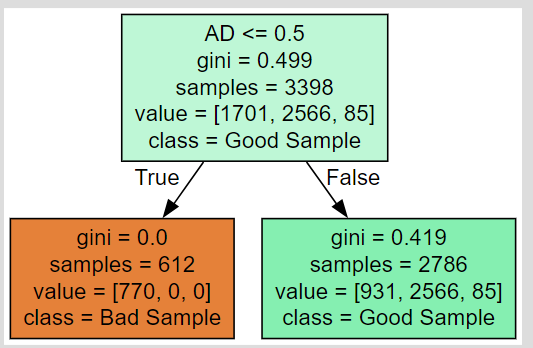

### <mark> Cross validation over _two_ parameters </mark>

In [ ]:
#
# So, to compare different parameters, let's use cv
#

from sklearn.model_selection import cross_val_score

#
# cross-validation splits the training set into two pieces:
#   + model-building and model-validation. We'll use "build" and "validate"
#

#
# lab task:  wrap this loop in another one! (or create an inner one...)
#

best_d = 1         # range(1,6)
best_ntrees = 50   # [50,150,250]
best_accuracy = 0

# opted for a lower range, as accuracy was already high and did not want to overtrain
for d in range(1,5):
    for ntrees in [50,150,250]:
        rforest_model = ensemble.RandomForestClassifier(max_depth=d,
                                                        n_estimators=ntrees,
                                                        max_samples=0.5)
        cv_scores = cross_val_score( rforest_model, X_train, y_train, cv=5 ) # 5 means 80/20 split
        average_cv_accuracy = cv_scores.mean()  # more likely, only their average
        print(f"depth: {d:2d} ntrees: {ntrees:3d} cv accuracy: {average_cv_accuracy:7.4f}")
        if average_cv_accuracy > best_accuracy:
            best_accuracy = average_cv_accuracy
            best_d = d
            best_ntrees = ntrees

#
# your task: assign best values by keeping a "running max"
#
best_depth = best_d
best_num_trees = best_ntrees

# This will be incorrect when initially run (you'll fix it):
print()
print(f"best_depth: {best_depth} and best_num_trees: {best_num_trees} are our choices. Acc: {best_accuracy}")

#
# remember that the RF lab task is to complete this nested cross-validation loop!
#

depth:  1 ntrees:  50 cv accuracy:  0.7810
depth:  1 ntrees: 150 cv accuracy:  0.7726
depth:  1 ntrees: 250 cv accuracy:  0.7771
depth:  2 ntrees:  50 cv accuracy:  0.7785
depth:  2 ntrees: 150 cv accuracy:  0.7878
depth:  2 ntrees: 250 cv accuracy:  0.7924
depth:  3 ntrees:  50 cv accuracy:  0.8253
depth:  3 ntrees: 150 cv accuracy:  0.8437
depth:  3 ntrees: 250 cv accuracy:  0.8463
depth:  4 ntrees:  50 cv accuracy:  0.8753
depth:  4 ntrees: 150 cv accuracy:  0.8772
depth:  4 ntrees: 250 cv accuracy:  0.8825

best_depth: 4 and best_num_trees: 250 are our choices. Acc: 0.8824549241749027


In [ ]:
# this seems like a reasonable balance between overfitting and underfitting
"""
depth:  3 ntrees: 250 cv accuracy:  0.8334
depth:  4 ntrees:  50 cv accuracy:  0.8785
depth:  4 ntrees: 150 cv accuracy:  0.8881
depth:  4 ntrees: 250 cv accuracy:  0.8914

best_depth: 4 and best_num_trees: 250 are our choices. Acc: 0.8914173384301531
"""

'\ndepth:  3 ntrees: 250 cv accuracy:  0.8334\ndepth:  4 ntrees:  50 cv accuracy:  0.8785\ndepth:  4 ntrees: 150 cv accuracy:  0.8881\ndepth:  4 ntrees: 250 cv accuracy:  0.8914\n\nbest_depth: 4 and best_num_trees: 250 are our choices. Acc: 0.8914173384301531\n'

In [ ]:
#
# Now, we re-create and re-run the  "Model-building and -training Cell"
#
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests
best_depth = best_depth
best_num_trees = best_num_trees
# we should have best_depth and best_num_trees
rforest_model_tuned = ensemble.RandomForestClassifier(max_depth=best_depth,
                                                        n_estimators=best_num_trees,
                                                        max_samples=0.5)

# we train the model (it's one line!)
rforest_model_tuned.fit(X_train, y_train)                              # yay!  trained!
print(f"Built an RF classifier with depth={best_depth} and ntrees={best_num_trees}")

Built an RF classifier with depth=4 and ntrees=250


### <mark> Let's test the tuned model </mark>

In [ ]:
#
# Ok!  We have tuned our RF to use the "best" parameters
#
# Now, we use ALL available data to train our final predictive model:
#
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests

# we should have best_depth and best_num_trees
rforest_model_final = ensemble.RandomForestClassifier(max_depth=best_depth,
                                                        n_estimators=best_num_trees,
                                                        max_samples=0.5)

# we train the model (it's one line!)
rforest_model_final.fit(X_all, y_all)              # yay!  trained!
print(f"Built an RF classifier with depth={best_depth} and ntrees={best_num_trees}")

Built an RF classifier with depth=4 and ntrees=250


In [ ]:
#
# final predictive model (decision trees), with tuned parameters + ALL data incorporated
# bad sample maps to 0
# good sample maps to 1
# incomplete sample maps to 2

def predictive_model( Features, Model ):
    """ input: a list of features
        [ alleles...pos, etc.]

        output: the predicted species (quality) of the sample
                  {'Bad Sample': 0, 'Good Sample': 1, 'Incomplete Sample': 2}
    """
    our_features = np.asarray([Features])                 # extra brackets needed
    predicted_species = Model.predict(our_features)       # The model's prediction!
    predicted_species = int(round(predicted_species[0]))  # unpack the extra brackets
    return predicted_species

# Features = eval(input("Enter new Features: "))
# predicted_species = predictive_model( Features, rforest_model_final )  # pass in the model, too!
# name = SPECIES[predicted_species]
# print(f"I predict {name} from the features {Features}")

### <mark> Feature importances ... </mark>

... tend to be even more meaningful when tapped from Random Forests

This is because the "wisdom of the crowd" can emerge:

In [ ]:
#
# feature importances are often even more "important" than predictions...
#
#    Random forests can provide a much "smoother" measure of feature importance, since
#                   they integrate over so many individual models (each tree)
#
#    That is, it's much less likely that a feature will have 0% importance, unless it never varies
#

print(rforest_model_final.feature_importances_)
print()

# let's see them with each feature name:
IMPs = rforest_model_final.feature_importances_

# enumerate is great when you want indices _and_ elements!
for i, importance in enumerate(IMPs):
    perc = importance*100
    print(f"Feature {COLUMNS[i]:>30s} has {perc:>7.2f}% of the decision-making importance.")

[0.00029212 0.10039576 0.12062598 0.09968923 0.00232484 0.00503868
 0.00242478 0.00111009 0.         0.00093788 0.02047515 0.10061324
 0.07504506 0.0012899  0.         0.00157136 0.0511698  0.00092239
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.22053476 0.00727435 0.18633727 0.0010476  0.00087976]

Feature                        alleles has    0.03% of the decision-making importance.
Feature                           qual has   10.04% of the decision-making importance.
Feature                        info.AC has   12.06% of the decision-making importance.
Feature                        info.AF has    9.97% of the decision-making importance.
Feature                        info.AN has    0.23% of the decision-making importance.
Feature    


### <mark> Visualizing the feature importances </mark>

['alleles', 'qual', 'info.AC', 'info.AF', 'info.AN', 'info.BaseQRankSum', 'info.ClippingRankSum', 'info.DP', 'info.DS', 'info.FS', 'info.InbreedingCoeff', 'info.MLEAC', 'info.MLEAF', 'info.MQ', 'info.MQ0', 'info.MQRankSum', 'info.QD', 'info.ReadPosRankSum', 'pheno.is_female', 'pheno.purple_hair', 'pheno.caffeine_consumption', 'pheno.six_toes', 'sample_qc.dp_stats.mean', 'sample_qc.dp_stats.stdev', 'sample_qc.dp_stats.min', 'sample_qc.dp_stats.max', 'sample_qc.gq_stats.mean', 'sample_qc.gq_stats.stdev', 'sample_qc.gq_stats.min', 'sample_qc.gq_stats.max', 'sample_qc.call_rate', 'sample_qc.n_called', 'sample_qc.n_not_called', 'sample_qc.n_filtered', 'sample_qc.n_hom_ref', 'sample_qc.n_het', 'sample_qc.n_hom_var', 'sample_qc.n_non_ref', 'sample_qc.n_singleton', 'sample_qc.n_snp', 'sample_qc.n_insertion', 'sample_qc.n_deletion', 'sample_qc.n_transition', 'sample_qc.n_transversion', 'sample_qc.n_star', 'sample_qc.r_ti_tv', 'sample_qc.r_het_hom_var', 'my_qc1', 'AD', 'DP', 'GQ', 'chromosome', 

'Result:'

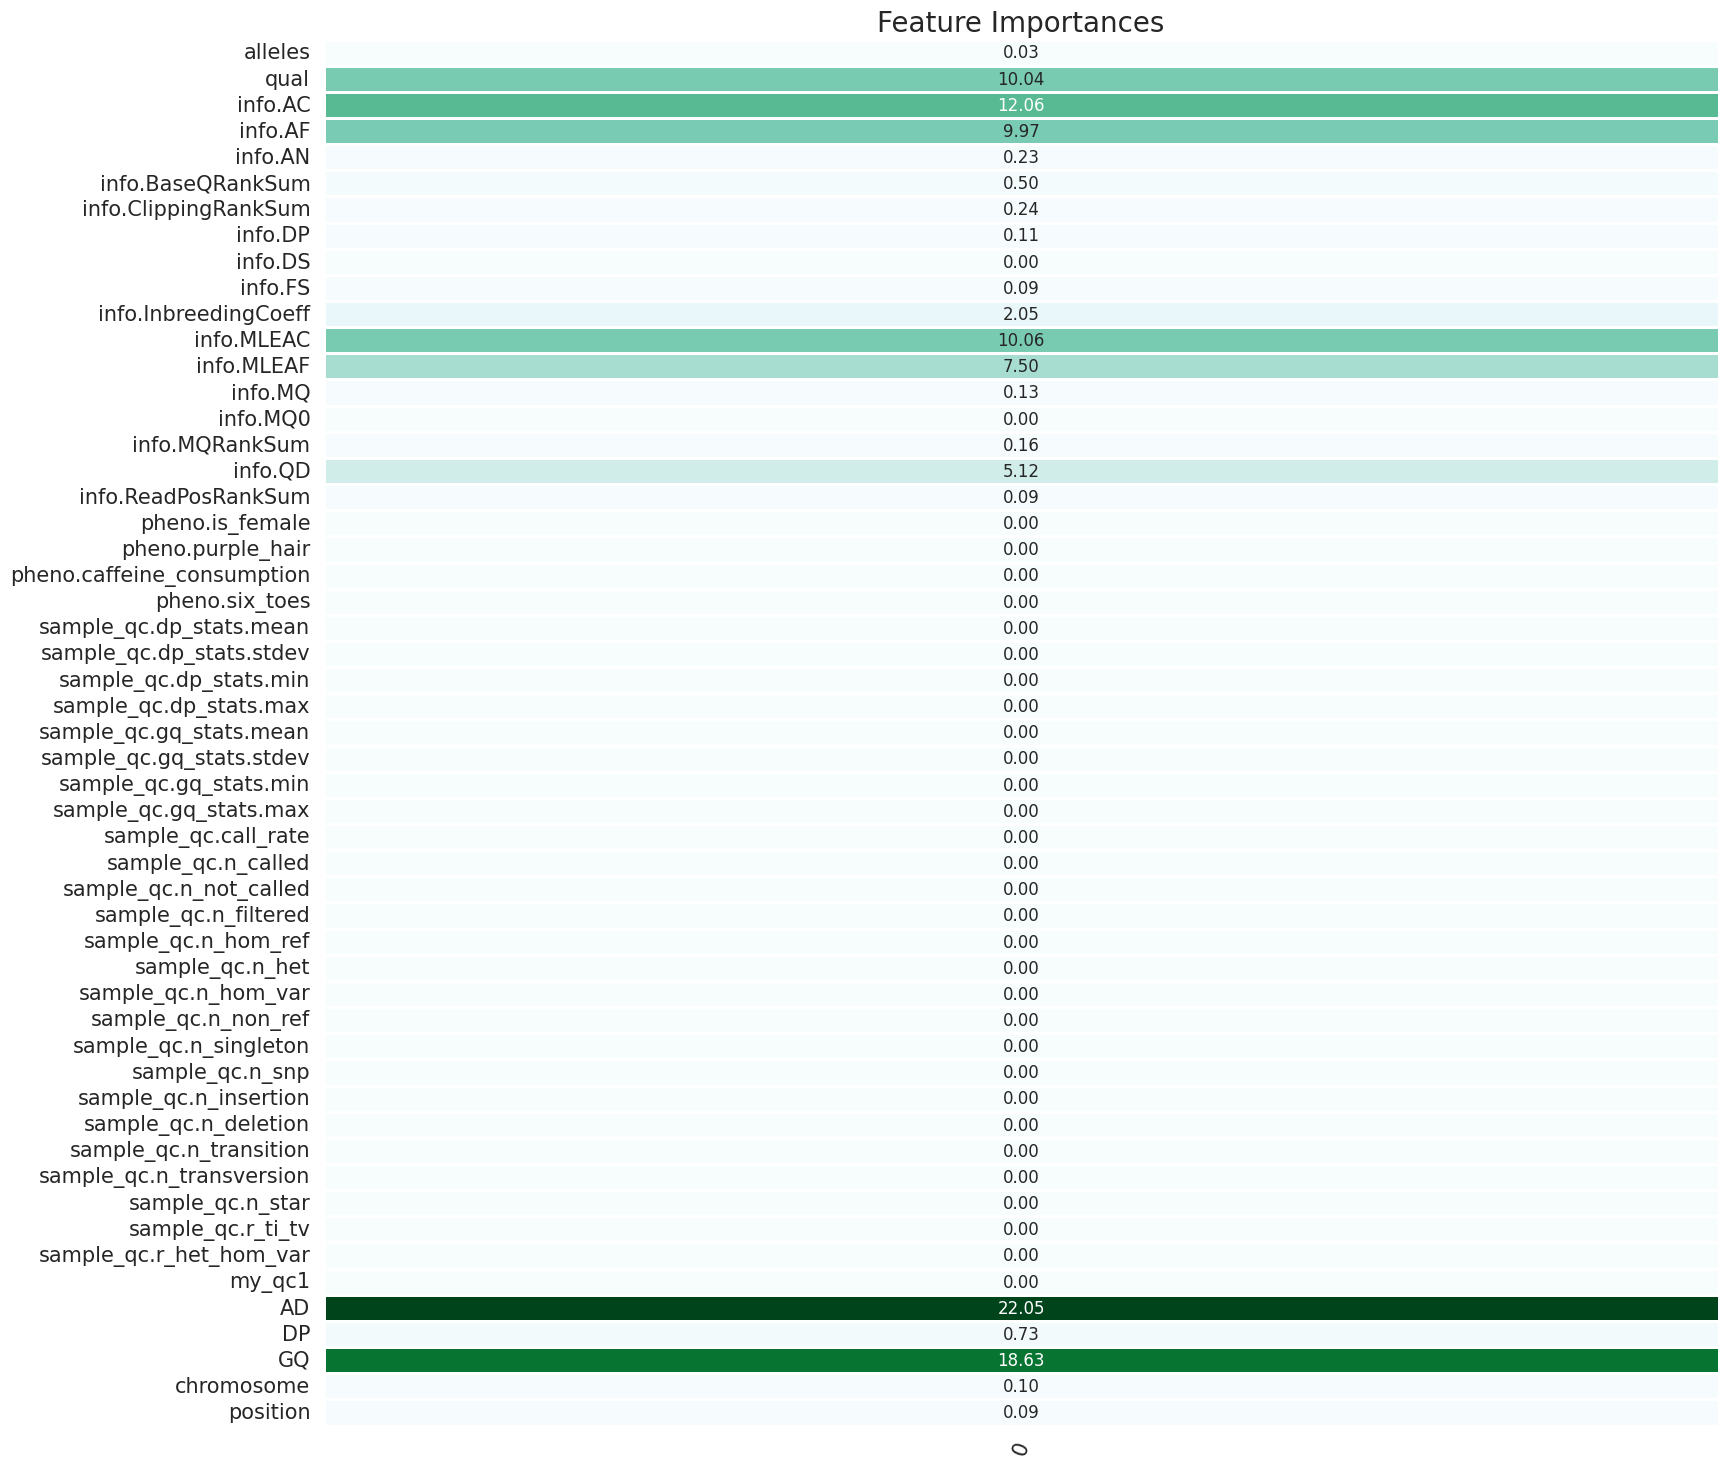

In [ ]:
percents = []
feats = []

for i, importance in enumerate(IMPs):
    perc = float(importance*100)
    percents.append(perc)
    feat = COLUMNS[i]
    feats.append(feat)

print(feats)
print(percents)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

my_data_list = [percents]
my_dataframe = pd.DataFrame(my_data_list, columns=feats)
my_dataframe = my_dataframe.T

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(18, 18))  # (18, 12)
sns.heatmap(data=my_dataframe, annot=True, fmt=".2f", linewidths=2, yticklabels=True, cmap="BuGn", cbar=False, ax=ax)

ax.set_title('Feature Importances', size=20)
ylocs, ylabels = plt.yticks()
plt.setp(ylabels, rotation=0, fontsize=15)
xlocs, xlabels = plt.xticks()
plt.setp(xlabels, rotation=70, fontsize=15)
"Result:"